# Applications of plane-wave destruction filters

### Sergey Fomel
### Published in Geophysics, 67, 1946-1960 (2002)

  Plane-wave destruction filters originate from a local plane-wave
  model for characterizing seismic data. These filters can be thought
  of as a $T$-$X$ analog of $F$-$X$ prediction-error filters and as an
  alternative to $T$-$X$ prediction-error filters. The filters are
  constructed with the help of an implicit finite-difference scheme
  for the local plane-wave equation.  On several synthetic and
  real-data examples, I demonstrate that finite-difference plane-wave
  destruction filters perform well in applications such as fault
  detection, data interpolation, and noise attenuation.

## Introduction

Plane-wave destruction filters, introduced by Claerbout (1992), serve the purpose of
characterizing seismic images by a superposition of local plane waves.
They are constructed as finite-difference stencils for the plane-wave
differential equation. In many cases, a local plane-wave model is a very
convenient representation of seismic data. Unfortunately, early
experiences with applying plane-wave destructors for interpolating
spatially aliased data (Nichols, 1990; Claerbout, 1992) demonstrated their poor performance in comparison
with that of industry-standard $F$-$X$ prediction-error filters (Spitz, 1991).

For each given frequency, an $F$-$X$ prediction-error filter (PEF) can
be thought of as a $Z$-transform polynomial. The roots of the polynomial
correspond precisely to predicted plane waves (Canales, 1984). Therefore, $F$-$X$ PEFs
simply represent a spectral (frequency-domain) approach to plane-wave
destruction[1] This powerful and efficient approach is, however, not
theoretically adequate when the plane-wave slopes or the boundar
conditions vary both spatially and temporally. In practice, this
limitation is addressed by breaking the data into windows and assuming
that the slopes are stationary within each window.

Multidimensional $T$-$X$ prediction-error filters (Claerbout, 1992, 1999) share the same purpose
of predicting local plane waves. They work well with spatially aliased
data and allow for both temporal and spatial variability of the slopes.
In practice, however, $T$-$X$ filters appear as very mysterious objects,
because their construction involves many non-intuitive parameters. The
user needs to choose a raft of parameters, such as the number of filter
coefficients, the gap and the exact shape of the filter, the size,
number, and shape of local patches for filter estimation, the number of
iterations, and the amount of regularization. Recently developed
techniques for handling non-stationary PEFs (Crawley et al., 1999) performed well in a variety
of applications (Crawley, 2000; Guitton et al., 2001), but the large number of adjustable parameters still
requires a significant level of human interaction and remains the
drawback of the method.

Clapp et al. (1998) have recently revived the original plane-wave destructors for
preconditioning tomographic problems with a predefined dip field (Clapp, 2001). The
filters were named *steering filters* because of their ability to steer
the solution in the direction of the local dips. The name is also
reminiscent of *steerable filters* used in medical image processing (Freeman and Adelson, 1991; Simoncelli and Farid, 1996).

In this paper, I revisit Claerbout’s original technique of
finite-difference plane-wave destruction. First, I develop an approach
for increasing the accuracy and dip bandwidth of the method. Applying
the improved filter design to several data regularization problems, I
discover that the finite-difference filters often perform as well as, or
even better than, $T$-$X$ PEFs. At the same time, they keep the number
of adjustable parameters to a minimum, and the only estimated quantity
has a clear physical meaning of the local plane-wave slope. No local
windows are required, because the slope is estimated as a smoothly
variable continuous function of the data coordinates.

Conventional methods for estimating plane-wave slopes are based on
picking maximum values of stacking semblance and other cumulative
coherency measures (Neidell and Taner, 1971). The differential approach to slope estimation,
employed by plane-wave destruction filters, is related to the
differential semblance method (Symes and Carazzone, 1991). Its theoretical superiority to
conventional semblance measures for the problem of local plane wave
detection has been established by Symes (1994) and Kim and Symes (1998).

## High-order plane-wave destructors

Following the physical model of local plane waves, we can define the
mathematical basis of the plane-wave destruction filters as the local
plane differential equation 
\begin{equation}
\frac{\partial P}{\partial x} + 
  \sigma\,\frac{\partial P}{\partial t} = 0\;,
  \label{eqn:pde}
\end{equation}  
where $P(t,x)$ is the wave field, and $\sigma$ is
the local slope, which may also depend on $t$ and $x$. In the case of a
constant slope,
equation (<a href="#eqn:pde" data-reference-type="ref" data-reference="eqn:pde">1</a>)
has the simple general solution 
\begin{equation}
P(t,x) = f(t - \sigma x)\;,
  \label{eqn:plane}
\end{equation}  
where $f(t)$ is an arbitrary waveform.
Equation (<a href="#eqn:plane" data-reference-type="ref" data-reference="eqn:plane">2</a>)
is nothing more than a mathematical description of a plane wave.

If we assume that the slope $\sigma$ does not depend on $t$, we can
transform
equation (<a href="#eqn:pde" data-reference-type="ref" data-reference="eqn:pde">1</a>)
to the frequency domain, where it takes the form of the ordinary
differential equation 
\begin{equation}
{\frac{d \hat{P}}{d x}} +
  i \omega\,\sigma\, \hat{P} = 0
  \label{eqn:ode}
\end{equation}
and has the general solution
\begin{equation}
\hat{P} (x) = \hat{P} (0)\,e^{i \omega\,\sigma x}\;,
  \label{eqn:px}
\end{equation}
where $\hat{P}$ is the Fourier transform of $P$. The
complex exponential term in
equation (<a href="#eqn:px" data-reference-type="ref" data-reference="eqn:px">4</a>)
simply represents a shift of a $t$-trace according to the slope $\sigma$
and the trace separation $x$.

In the frequency domain, the operator for transforming the trace at
position $x-1$ to the neighboring trace and at position $x$ is a
multiplication by $e^{i \omega\,\sigma}$. In other words, a plane wave can be perfectly
predicted by a two-term prediction-error filter in the $F$-$X$ domain:
\begin{equation}
a_0 \, \hat{P} (x) + a_1\, \hat{P} (x-1) = 0\;,
  \label{eqn:pef}
\end{equation} 
where $a_0 = 1$ and $a_1 = - e^{i \omega\,\sigma}$.
The goal of predicting several plane waves can be accomplished by
cascading several two-term filters. In fact, any $F$-$X$
prediction-error filter represented in the $Z$-transform notation as
\begin{equation}
A(Z_x) = 1 + a_1 Z_x + a_2 Z_x^2 + \cdots + a_N Z_x^N
  \label{eqn:pef2}
\end{equation}
can be factored into a product of two-term filters:
\begin{equation}
A(Z_x) = \left(1 - \frac{Z_x}{Z_1}\right)\left(1 - \frac{Z_x}{Z_2}\right)
  \cdots\left(1 - \frac{Z_x}{Z_N}\right)\;,
  \label{eqn:pef3}
\end{equation}
where $Z_1,Z_2,\ldots,Z_N$ are the zeroes of
polynomial (<a href="#eqn:pef2" data-reference-type="ref" data-reference="eqn:pef2">6</a>).
According to
equation (<a href="#eqn:pef" data-reference-type="ref" data-reference="eqn:pef">5</a>),
the phase of each zero corresponds to the slope of a local plane wave
multiplied by the frequency. Zeroes that are not on the unit circle
carry an additional amplitude gain not included in
equation (<a href="#eqn:ode" data-reference-type="ref" data-reference="eqn:ode">3</a>).

In order to incorporate time-varying slopes, we need to return to the
time domain and look for an appropriate analog of the phase-shift
operator (<a href="#eqn:px" data-reference-type="ref" data-reference="eqn:px">4</a>)
and the plane-prediction
filter (<a href="#eqn:pef" data-reference-type="ref" data-reference="eqn:pef">5</a>).
An important property of plane-wave propagation across different traces
is that the total energy of the propagating wave stays invariant
throughout the process: the energy of the wave at one trace is
completely transmitted to the next trace. This property is assured in
the frequency-domain
solution (<a href="#eqn:px" data-reference-type="ref" data-reference="eqn:px">4</a>)
by the fact that the spectrum of the complex exponential
$e^{i \omega\,\sigma}$ is equal to one. In the time domain, we can reach
an equivalent effect by using an all-pass digital filter. In the
$Z$-transform notation, convolution with an all-pass filter takes the
form 
\begin{equation}
\hat{P}_{x+1}(Z_t) = \hat{P}_{x} (Z_t) \frac{B(Z_t)}{B(1/Z_t)}\;,
\label{eqn:allpass}
\end{equation}
where $\hat{P}_x (Z_t)$ denotes the $Z$-transform
of the corresponding trace, and the ratio $B(Z_t)/B(1/Z_t)$ is an
all-pass digital filter approximating the time-shift
operator $e^{i \omega \sigma}$. In finite-difference terms,
equation (<a href="#eqn:allpass" data-reference-type="ref" data-reference="eqn:allpass">8</a>)
represents an implicit finite-difference scheme for solving
equation (<a href="#eqn:pde" data-reference-type="ref" data-reference="eqn:pde">1</a>)
with the initial conditions at a constant $x$. The coefficients of
filter $B(Z_t)$ can be determined, for example, by fitting the filter
frequency response at low frequencies to the response of the phase-shift
operator. The Taylor series technique (equating the coefficients of the
Taylor series expansion around zero frequency) yields the expression
\begin{equation}
B_3(Z_t) = 
  \frac{(1-\sigma)(2-\sigma)}{12}\,Z_t^{-1} + 
  \frac{(2+\sigma)(2-\sigma)}{6} +
  \frac{(1+\sigma)(2+\sigma)}{12}\,Z_t
  \label{eqn:b3}
\end{equation}
for a three-point centered filter $B_3(Z_t)$ and the
expression 
\begin{equation}
\begin{aligned}
  B_5(Z_t) & = &  
  \frac{(1-\sigma)(2-\sigma)(3-\sigma)(4-\sigma)}{1680}\,Z_t^{-2} +
  \frac{(4-\sigma)(2-\sigma)(3-\sigma)(4+\sigma)}{420}\,Z_t^{-1} + 
  \nonumber \\
  & & 
  \frac{(4-\sigma)(3-\sigma)(3+\sigma)(4+\sigma)}{280} + 
  \nonumber \\
  & & 
  \frac{(4-\sigma)(2+\sigma)(3+\sigma)(4+\sigma)}{420}\,Z_t +
  \frac{(1+\sigma)(2+\sigma)(3+\sigma)(4+\sigma)}{1680}\,Z_t^2
  \label{eqn:b5}\end{aligned}
\end{equation}  
for a five-point centered filter
$B_5(Z_t)$. The derivation of
equations (<a href="#eqn:b3" data-reference-type="ref" data-reference="eqn:b3">9</a>-<a href="#eqn:b5" data-reference-type="ref" data-reference="eqn:b5">10</a>)
is detailed in the appendix. It is easy to generalize these equations to longer filters.

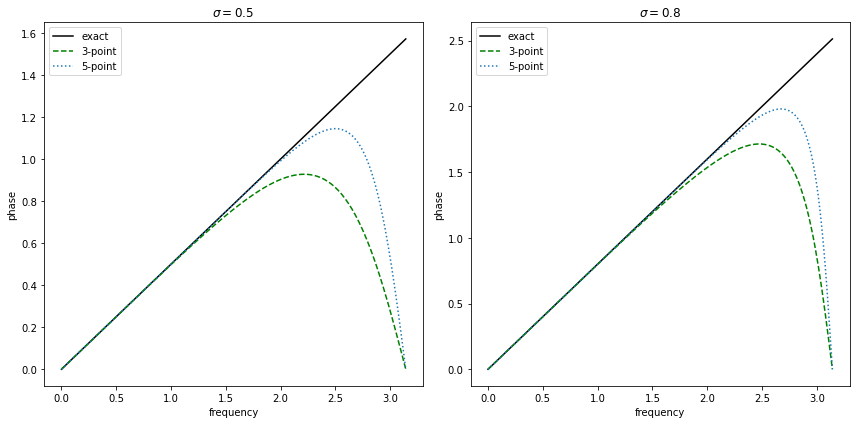

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def m(p): return 1/12*(1+p)*(2+p)
def m1(p): return 1/1680*(1+p)*(2+p)*(3+p)*(4+p)
def m2(p): return 1/420*(4-p)*(2+p)*(3+p)*(4+p)
def f3(p, z): return m(p)*z + (1-m(p)-m(-p)) + m(-p)/z
def f5(p, z): return m1(p)*z**2 + m2(p)*z + (1-m1(p)-m1(-p)-m2(p)-m2(-p)) + m2(-p)/z + m1(-p)/z**2
def a3(p, z): return f3(p, z)/f3(p, 1/z)
def a5(p, z): return f5(p, z)/f5(p, 1/z)

def phaseplot(ax, sigma):
    w = np.linspace(0, np.pi, num=200)
    ax.plot(w, w*sigma, label='exact', color='black')
    ax.plot(w, np.angle(a3(sigma, np.exp(1j*w))),
            label='3-point', color='green', linestyle='--')
    ax.plot(w, np.angle(a5(sigma, np.exp(1j*w))),
            label='5-point', linestyle=':')
    ax.legend()
    ax.set_xlabel('frequency')
    ax.set_ylabel('phase')
    ax.set_title(f'$\sigma={sigma}$')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)
phaseplot(ax1, 1/2)
phaseplot(ax2, 4/5)
plt.show()

<p id="fig:phase" style="color:navy">Figure 1: Phase of the implicit finite-difference shift operators in comparison with
the exact solution. The left plot corresponds to the slope of $\sigma=0.5$, the right plot
to $\sigma=0.8$.</p>

Figure <a href="#fig:phase" data-reference-type="ref" data-reference="fig:phase">1</a>
shows the phase of the all-pass filters $B_3(Z_t)/B_3(1/Z_t)$ and
$B_5(Z_t)/B_5(1/Z_t)$ for two values of the slope $\sigma$ in comparison
with the exact linear function of
equation (<a href="#eqn:px" data-reference-type="ref" data-reference="eqn:px">4</a>).
As expected, the phases match the exact line at low frequencies, and the
accuracy of the approximation increases with the length of the filter.

Taking both dimensions into consideration,
equation (<a href="#eqn:allpass" data-reference-type="ref" data-reference="eqn:allpass">8</a>)
transforms to the prediction equation analogous
to (<a href="#eqn:pef" data-reference-type="ref" data-reference="eqn:pef">5</a>)
with the 2-D prediction filter
\begin{equation}
A(Z_t,Z_x) = 1 - Z_x \frac{B(Z_t)}{B(1/Z_t)}\;.
  \label{eqn:2dpef}
\end{equation}  
In order to characterize several plane waves, we
can cascade several filters of the
form (<a href="#eqn:2dpef" data-reference-type="ref" data-reference="eqn:2dpef">11</a>)
in a manner similar to that of
equation (<a href="#eqn:pef3" data-reference-type="ref" data-reference="eqn:pef3">7</a>).
In the examples of this paper, I use a modified version of the filter
$A(Z_t,Z_x)$, namely the filter 
\begin{equation}
\label{eqn:2dpef2}
  C(Z_t,Z_x) = A(Z_t,Z_x) B(1/Z_t) = B(1/Z_t) - Z_x B(Z_t)\;,
\end{equation}
which avoids the need for polynomial division. In case of the 3-point
filter (<a href="#eqn:b3" data-reference-type="ref" data-reference="eqn:b3">9</a>),
the 2-D
filter (<a href="#eqn:2dpef2" data-reference-type="ref" data-reference="eqn:2dpef2">12</a>)
has exactly six coefficients. It consists of two columns, each column
having three coefficients and the second column being a reversed copy of
the first one. When
filter (<a href="#eqn:2dpef2" data-reference-type="ref" data-reference="eqn:2dpef2">12</a>)
is used in data regularization problems, it can occasionally cause
undesired high-frequency oscillations in the solution, resulting from
the near-Nyquist zeroes of the polynomial $B(Z_t)$. The oscillations are
easily removed in practice with appropriate low-pass filtering.

In the next section, I address the problem of estimating the local slope
$\sigma$ with filters of
form (<a href="#eqn:2dpef2" data-reference-type="ref" data-reference="eqn:2dpef2">12</a>).
Estimating the slope is a necessary step for applying the
finite-difference plane-wave filters on real data.

## Slope estimation

Let us denote by $\mathbf{C}(\mathbf{\sigma})$ the operator of
convolving the data with the 2-D filter $C(Z_t,Z_x)$ of
equation (<a href="#eqn:2dpef2" data-reference-type="ref" data-reference="eqn:2dpef2">12</a>),
assuming the local slope $\mathbf{\sigma}$ is known. In order to
determine the slope, we can define the least-squares goal
\begin{equation}
\label{eqn:ls}
  \mathbf{C}(\mathbf{\sigma}) \, \mathbf{d} \approx 0\;,
\end{equation}
where $\mathbf{d}$ is the known data and the approximate equality implies that
the solution is found by minimizing the power of the left-hand side.
Equations (<a href="#eqn:b3" data-reference-type="ref" data-reference="eqn:b3">9</a>)
and (<a href="#eqn:b5" data-reference-type="ref" data-reference="eqn:b5">10</a>)
show that the slope $\mathbf{\sigma}$ enters in the filter coefficients
in an essentially non-linear way. However, one can still apply the
linear iterative optimization methods by an analytical linearization of
equation (<a href="#eqn:ls" data-reference-type="ref" data-reference="eqn:ls">13</a>).
The linearization (also known as the Gauss-Newton iteration) implies
solving the linear system 
\begin{equation}
\label{eqn:linit}
  \mathbf{C}'(\mathbf{\sigma}_0) \, \Delta \mathbf{\sigma} \,
  \mathbf{d}  + \mathbf{C}(\mathbf{\sigma}_0) \, \mathbf{d} \approx 0
\end{equation}
for the slope increment $\Delta \mathbf{\sigma}$. Here
$\mathbf{\sigma}_0$ is the initial slope estimate, and
$\mathbf{C}'(\mathbf{\sigma})$ is a convolution with the filter,
obtained by differentiating the filter coefficients of
$\mathbf{C}(\mathbf{\sigma})$ with respect to $\mathbf{\sigma}$. After
system (<a href="#eqn:linit" data-reference-type="ref" data-reference="eqn:linit">14</a>)
is solved, the initial slope $\mathbf{\sigma}_0$ is updated by adding
$\Delta \mathbf{\sigma}$ to it, and one can solve the linear problem
again. Depending on the starting solution, the method may require
several non-linear iterations to achieve an acceptable convergence.

The slope $\sigma$ in
equation (<a href="#eqn:linit" data-reference-type="ref" data-reference="eqn:linit">14</a>)
does not have to be constant. We can consider it as varying in both time
and space coordinates. This eliminates the need for local windows but
may lead to undesirably rough (oscillatory) local slope estimates.
Moreover, the solution will be undefined in regions of unknown or
constant data, because for these regions the local slope is not
constrained. Both these problems are solved by adding a regularization
(styling) goal to
system (<a href="#eqn:linit" data-reference-type="ref" data-reference="eqn:linit">14</a>).
The additional goal takes the form 
\begin{equation}
\label{eqn:regs}
  \epsilon \mathbf{D} \, \Delta \mathbf{\sigma} \approx 0\;,
\end{equation}  
where $\mathbf{D}$ is an appropriate roughening operator and $\epsilon$ is a
scaling coefficient. For simplicity, I chose $\mathbf{D}$ to be the
gradient operator. More efficient and sophisticated helical
preconditioning techniques are available .

In theory, estimating two different slopes $\mathbf{\sigma}_1$ and
$\mathbf{\sigma}_2$ from the available data is only marginally more
complicated than estimating a single slope. The convolution operator
becomes a cascade of $\mathbf{C}(\mathbf{\sigma}_1)$ and
$\mathbf{C}(\mathbf{\sigma}_2)$, and the linearization yields
\begin{equation}
\label{eqn:lin2}
  \mathbf{C}'(\mathbf{\sigma}_1) \, \mathbf{C}(\mathbf{\sigma}_2) \, 
  \Delta \mathbf{\sigma}_1\, \mathbf{d} + \mathbf{C}(\mathbf{\sigma}_1) \, 
  \mathbf{C}'(\mathbf{\sigma}_2) \,
  \Delta \mathbf{\sigma}_2 \, \mathbf{d} + \mathbf{C}(\mathbf{\sigma}_1) \,
  \mathbf{C}(\mathbf{\sigma}_2) \, \mathbf{d} \approx 0\;.
\end{equation} 
The regularization condition should now be applied to both $\Delta
\mathbf{\sigma}_1$ and $\Delta \mathbf{\sigma}_2$: 

\begin{equation}
  \label{eqn:reg1}
  \begin{aligned} 
  \epsilon \mathbf{D} \, \Delta \mathbf{\sigma}_1 & \approx & 0\;; \\
  \epsilon \mathbf{D} \, \Delta \mathbf{\sigma}_2 & \approx & 0\;.\end{aligned}
\end{equation}

The solution will obviously depend on the initial values of
$\mathbf{\sigma}_1$ and $\mathbf{\sigma}_2$, which should not be equal
to each other.
System (<a href="#eqn:lin2" data-reference-type="ref" data-reference="eqn:lin2">16</a>)
is generally underdetermined, because it contains twice as many
estimated parameters as equations: The number of equations corresponds
to the grid size of the data $\mathbf{d}$, while characterizing variable
slopes $\sigma_1$ and $\sigma_2$ on the same grid involves two gridded
functions. However, an appropriate choice of the starting solution and
the additional
regularization (<a href="#eqn:reg1" data-reference-type="ref" data-reference="eqn:reg1">17</a>)
allow us to arrive at a practical solution.

The application examples of the next section demonstrate that when the
system of
equations (<a href="#eqn:linit" data-reference-type="ref" data-reference="eqn:linit">14</a>-<a href="#eqn:regs" data-reference-type="ref" data-reference="eqn:regs">15</a>)
or (<a href="#eqn:lin2" data-reference-type="ref" data-reference="eqn:lin2">16</a>-<a href="#eqn:reg2" data-reference-type="ref" data-reference="eqn:reg2">18</a>)
are optimized in the least-squares sense in a cycle of several
linearization iterations, it leads to smooth and reliable slope
estimates. The regularization
conditions (<a href="#eqn:regs" data-reference-type="ref" data-reference="eqn:regs">15</a>)
and (<a href="#eqn:reg1" data-reference-type="ref" data-reference="eqn:reg1">17</a>) assure a smooth extrapolation of the slope to the regions of unknown or constant data.

## Application examples

In this section, I examine the performance of the finite-difference
plane-destruction filters on several test applications. The general
framework for applying these filters consists of the two steps:

1.  Estimate the dominant local slope (or a set of local slopes) from
    the data. This step follows the least-squares optimization embedded
    in
    equations (<a href="#eqn:linit" data-reference-type="ref" data-reference="eqn:linit">14</a>)
    or (<a href="#eqn:lin2" data-reference-type="ref" data-reference="eqn:lin2">16</a>).
    Thanks to the general regularization technique of
    equations (<a href="#eqn:regs" data-reference-type="ref" data-reference="eqn:regs">15</a>
    )
    and (<a href="#eqn:reg1" data-reference-type="ref" data-reference="eqn:reg1">17</a>),
    locally smooth slope estimates are obtained without any need for
    breaking the data into local windows. Of course, local windows can
    be employed for other purposes (parallelization, memory management,
    etc.) Selecting appropriate initial values for the local slopes can
    speed up the computation and steer it towards desirable results. It
    is easy to incorporate additional constraints on the local slope
    values.

2.  Using the estimated slope, apply non-stationary plane-wave
    destruction filters for the particular application purposes. In the
    fault detection application, we simply look at the output of
    plane-wave destruction. In the interpolation application, the
    filters are used to constrain the missing data. In the noise
    attenuation application, they characterize the coherent signal and
    noise components in the data.

A description of these particular applications follows next.

### Fault detection

The use of prediction-error filters in the problem of detecting local
discontinuities was suggested by Claerbout (1994, 1999), and further refined by Schwab et al. (1996) and Schwab (1998). Bednar (1998) used simple plane-destruction filters in a similar setting to compute Claerbout (1999).coherency attributes.

To test the performance of the improved plane-wave destructors, I chose
several examples from Claerbout (1999).

In [35]:
%%file lomo.scons

Flow('sigmoid', None,
     '''
     sigmoid d1=.004 n1=200 d2=.008 n2=200 |
     smooth rect1=3 diff1=1 adj=1 | smooth rect1=3
     ''')

Flow('conflict', None, 'conflict -')

Fetch('WGstack.H', 'book/iee')
Flow('dgulf', 'WGstack.H', 'dd form=native | window n1=1000 f2=1020 n2=200')

Fetch('wz.27.H', 'wz')
Flow('yc', 'wz.27.H', 'dd form=native | window n1=400 n2=64| tpow tpow=2')
Flow('yc2', 'yc', 'window f2=21')
Flow('yc27', 'yc yc2', 'window n2=20 | pad n2=21 | cat axis=2 ${SOURCES[1]}')

cases = {
    'sigmoid': dict(order=2, p0=0, smoo=3, pclip=100, rect=3),
    'conflict': dict(order=1, p0=0, smoo=1, pclip=100, rect=5),
    'dgulf': dict(order=1, p0=0, smoo=4, pclip=96, rect=10),
    'yc27': dict(order=3, p0=2, smoo=3, pclip=99.5, rect=3),
}

for case in list(cases.keys()):
    dip = case + '-dip'
    pwd = case + '-pwd'
    txr = case + '-txr'

    Plot(case, 'grey title=INPUT')
    Result(case, 'grey title=INPUT screenratio=1.2')

    Flow(dip, case,
         '''
         dip order={order} p0={p0} verb=y 
         niter=10 rect1={rect} rect2={rect}'''.format(**cases[case]))
    Plot(dip, 'grey title=DIP scalebar=y pclip=100')

    Flow(pwd, [case, dip],
         '''
         pwd order={order} dip=${{SOURCES[1]}} | 
         smooth rect1={smoo}
         '''.format(**cases[case]))
    Plot(pwd, 'grey pclip={pclip} title=RESIDUAL'.format(**cases[case]))

    Result(pwd,
           'grey pclip={pclip} title=RESIDUAL  screenratio=1.2'.format(**cases[case]))

    Flow(txr, dip,
         '''
         noise rep=y seed=2004 | smooth rect1=3 |
         pwspray reduce=gauss dip=$SOURCE ns=20 eps=0.01 |
         smooth rect1=3
         ''')
    Plot(txr, 'grey title=TEXTURE')

    Result(dip, [dip, pwd], 'SideBySideAniso')
    Result(txr, [case, txr], 'SideBySideAniso')

Overwriting lomo.scons


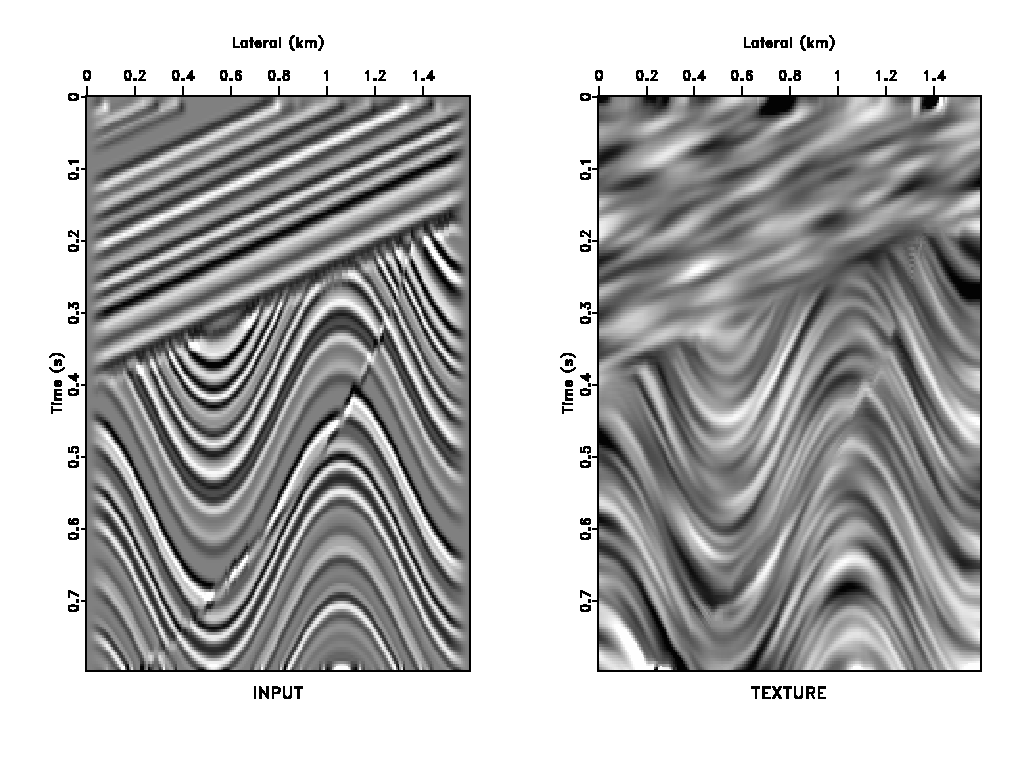

In [36]:
from m8r import view
view('sigmoid-txr')

<p id="fig:sigmoid-txr" style="color:navy">Figure 2: Synthetic sedimentary model. Left plot: Input data. Right plot: Its texture.
The texture is computed by convolving a  eld number with the inverse of plane-wave
destruction  lters. It highlights the position of estimated local plane waves.</p>

Figure <a href="#fig:sigmoid-txr" data-reference-type="ref" data-reference="fig:sigmoid-txr">2</a>
introduces the first example. The left plot of the figure shows a
synthetic model, which resembles sedimentary layers with a plane
unconformity and a curvilinear fault. The model contains 200 traces of
200 samples each. The right plot shows the corresponding *texture* (Claerbout and Brown,
1999), obtained by convolving a field of random numbers with the inverse of
plane-wave destruction filters. The inverses are constructed using
helical filtering techniques (Claerbout, 1998; Fomel, 2001). Texture plots allow us to quickly access
the ability of the destruction filters to characterize the main locally
plane features in the data. The dip field was estimated by the
linearization method of the previous section. 

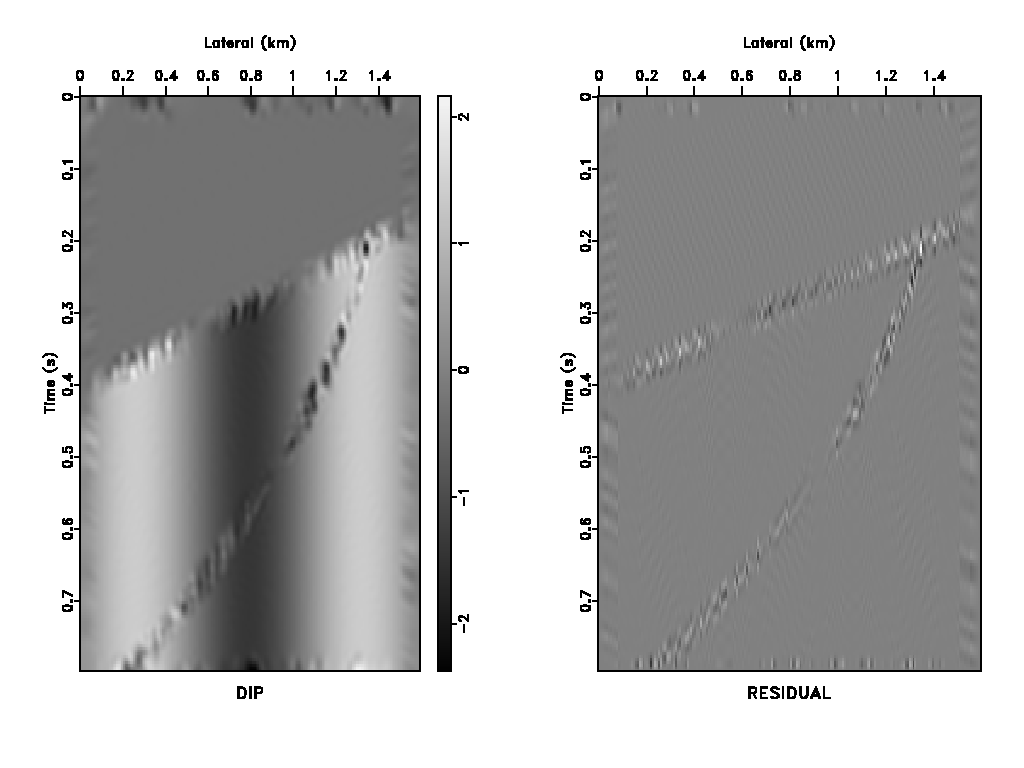

In [37]:
view('sigmoid-dip')

<p id="fig:sigmoid-dip" style="color:navy">Figure 3: Synthetic sedimentary model. Left plot: Estimated dip  eld. Right plot:
Prediction residual. Large absolute residual indicates the location of faults.</p>

The dip field itself and
the prediction residual \[the left-hand side of
equation (<a href="#eqn:ls" data-reference-type="ref" data-reference="eqn:ls">13</a>)\]
are shown in the left and right plots of
Figure <a href="#fig:sigmoid-dip" data-reference-type="ref" data-reference="fig:sigmoid-dip">3</a>
respectively. We observe that the texture plot does reflect the dip
structure of the input data, which indicates that the dip field was
estimated correctly. The fault and unconformity are clearly visible both
in the dip estimate and in the residual plots. Anywhere outside the
slope discontinuities and the boundaries, the residual is close to zero.
Therefore, it can be used directly as a fault detection measure.

In [5]:
%%file claerbout.scons

example = 'sigmoid'
lom = 'lom-'+example
lag = 'lag-'+example
mpa = 'mpa-'+example
Flow([lom, lag], example, 'lopef a=7,2 w=20,8 lag=${TARGETS[1]}')
Flow(mpa, [example, lom], 'decon filt=${SOURCES[1]} rect1=3')
Result(example+'-clae', mpa, 'grey pclip=100 title=LOMOPLAN')

Overwriting claerbout.scons


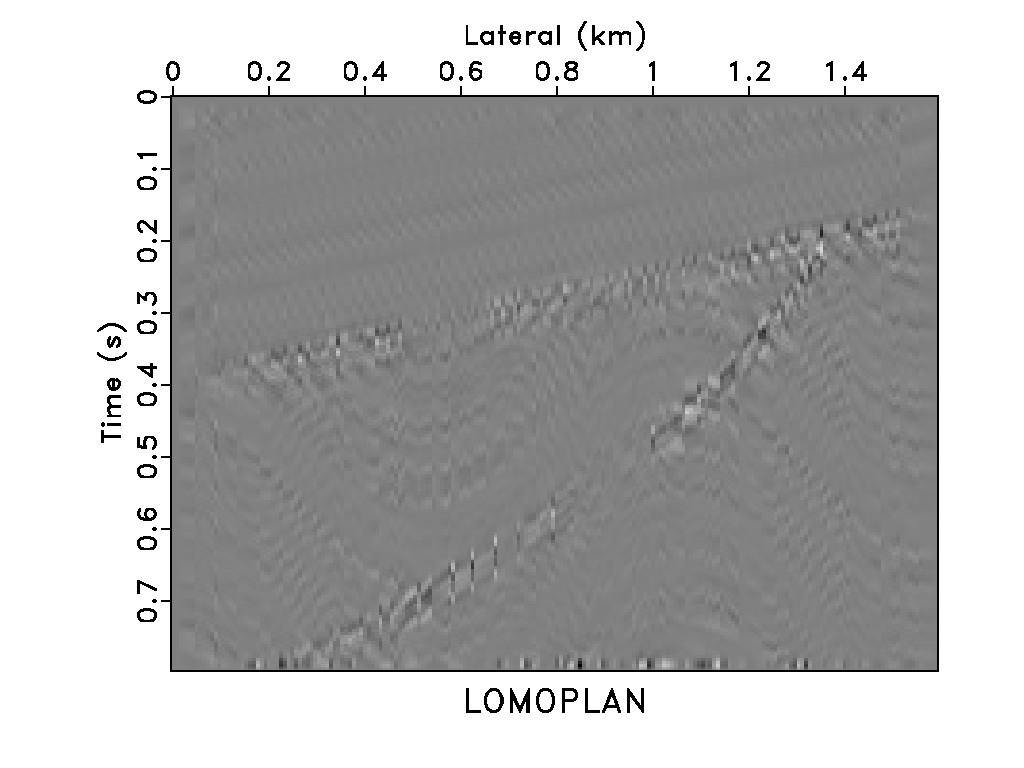

In [32]:
view('sigmoid-clae')

<p id="fig:sigmoid-clae" style="color:navy">Figure 4: Prediction residual of the 11-point prediction-error filter estimated in local 20x6 windows (reproduced from (Claerbout, 1999)).To be compared with the right plot in Figure 3.</p>

Comparing the residual plot in
Figure <a href="#fig:sigmoid-dip" data-reference-type="ref" data-reference="fig:sigmoid-dip">3</a>
with the analogous plot of Claerbout (1994, 1999), reproduced in
Figure <a href="#fig:sigmoid-clae" data-reference-type="ref" data-reference="fig:sigmoid-clae">4</a>,
establishes a superior performance of the improved finite-difference
destructors in comparison with that of the local $T$-$X$
prediction-error filters.

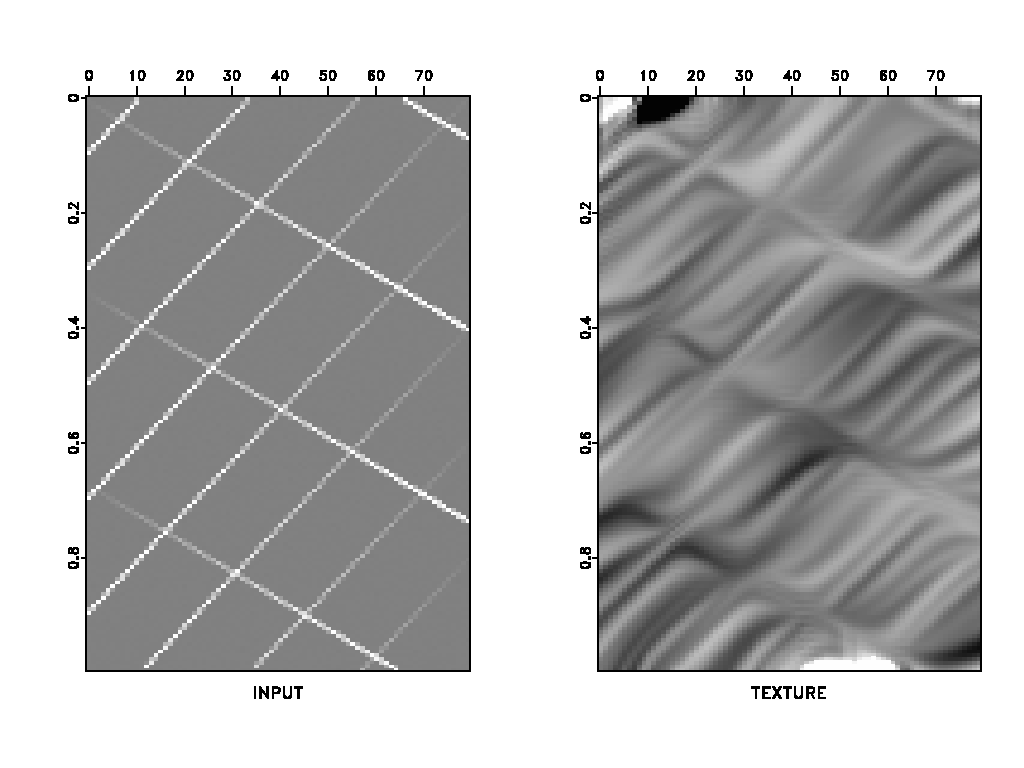

In [38]:
view('conflict-txr')

<p id="fig:conflict-txr" style="color:navy">Figure 5: Conflicting dips synthetic. Left plot: Input data. Right plot: Its texture.</p>

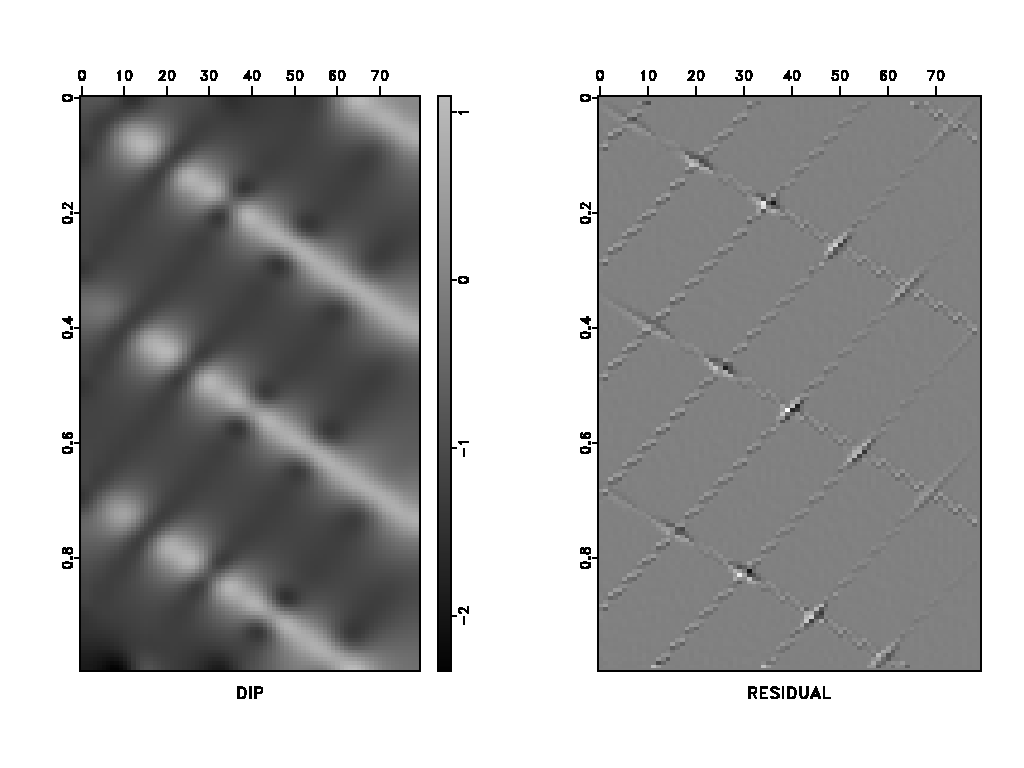

In [39]:
view('conflict-dip')

<p id="fig:conflict-dip" style="color:navy">Figure 6: Conflicting dips synthetic. Left plot: Estimated dip  eld. Right plot: Prediction residual. Large absolute residual indicates the location of conflicting dips.</p>

The left plot in
Figure <a href="#fig:conflict-txr" data-reference-type="ref" data-reference="fig:conflict-txr">5</a>
introduces a simpler synthetic test. The model is composed of linear
events with two conflicting slopes. A regularized dip field estimation
attempts to smooth the estimated dip in the places where it is not
constrained by the data (the left plot of
Figure <a href="#fig:conflict-dip" data-reference-type="ref" data-reference="fig:conflict-dip">6</a>.)
The effect of smoothing is clearly seen in the texture image (the right
plot in
Figure <a href="#fig:conflict-txr" data-reference-type="ref" data-reference="fig:conflict-txr">5</a>).
The corresponding residual (the right plot of
Figure <a href="#fig:conflict-dip" data-reference-type="ref" data-reference="fig:conflict-dip">6</a>)
shows suppressed linear events and highlights the places of their
intersection. Residuals are large at intersections because a single
dominant dip model fails to adequately represent both conflicting dips.

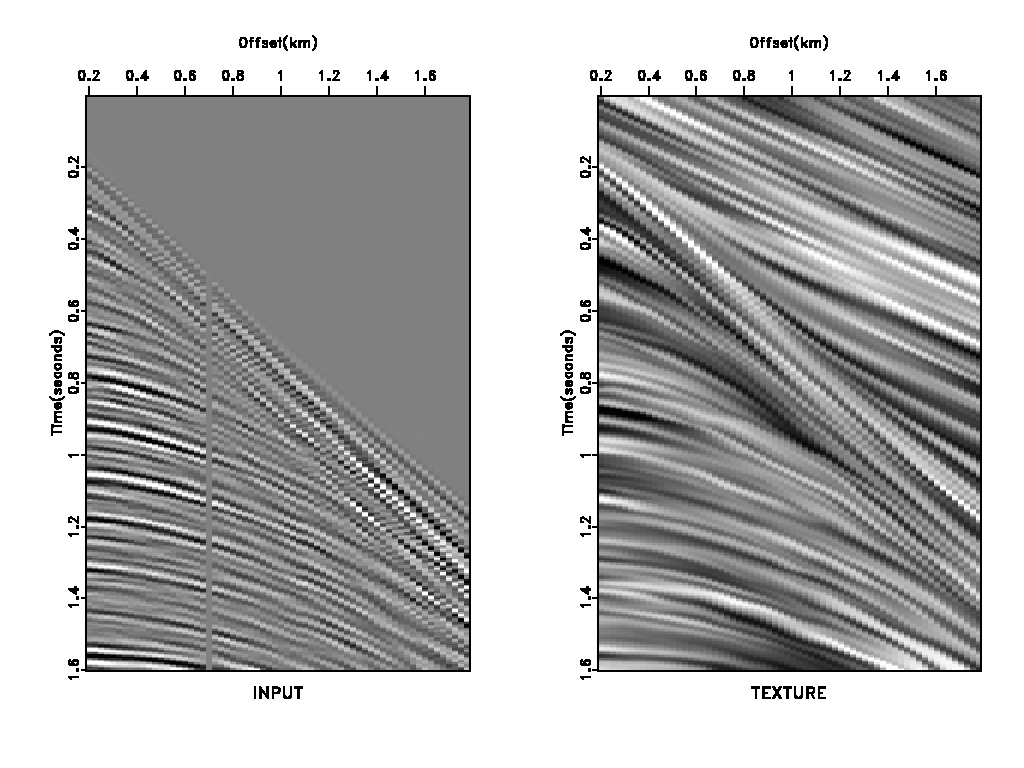

In [40]:
view('yc27-txr')

<p id="fig:yc27-txr" style="color:navy">Figure 7: Real shot gather. Left plot: Input data. Right plot: Its texture.</p>

The left plot in
Figure <a href="#fig:yc27-txr" data-reference-type="ref" data-reference="fig:yc27-txr">7</a>
shows a real shot gather: a portion of Yilmaz and Cumro
(1983) data set 27. The initial dip in
the dip estimation program was set to zero. Therefore, the texture image
(the right plot in
Figure <a href="#fig:yc27-txr" data-reference-type="ref" data-reference="fig:yc27-txr">7</a>)
contains zero-dipping plane waves in the places of no data. Everywhere
else the dip is accurately estimated from the data. 

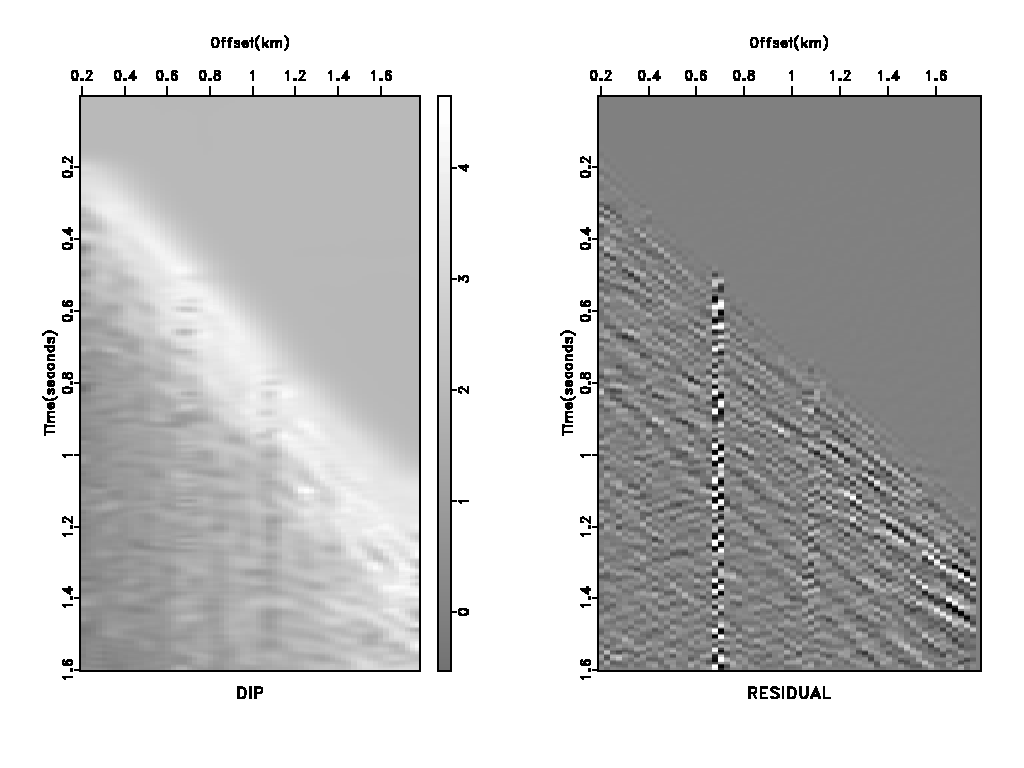

In [41]:
view('yc27-dip')

<p id="fig:yc27-txr" style="color:navy">Figure 8: Real shot gather. Left plot: Estimated dip  eld. Right plot: Prediction
residual. The residual highlights surface waves hidden under dominant reflection events in the original data.</p>

The data contain a
missing trace at about 0.7 km offset and a slightly shifted (possibly
mispositioned) trace at about 1.1 km offset. The mispositioned trace is
clearly visible in the dip estimate (the left plot in
Figure <a href="#fig:yc27-dip" data-reference-type="ref" data-reference="fig:yc27-dip">8</a>),
and the missing trace is emphasized in the residual image (the right
plot in
Figure <a href="#fig:yc27-dip" data-reference-type="ref" data-reference="fig:yc27-dip">8</a>).
Additionally, the residual image reveals the forward and back-scattered
surface waves, hidden under more energetic reflections in the input
data.

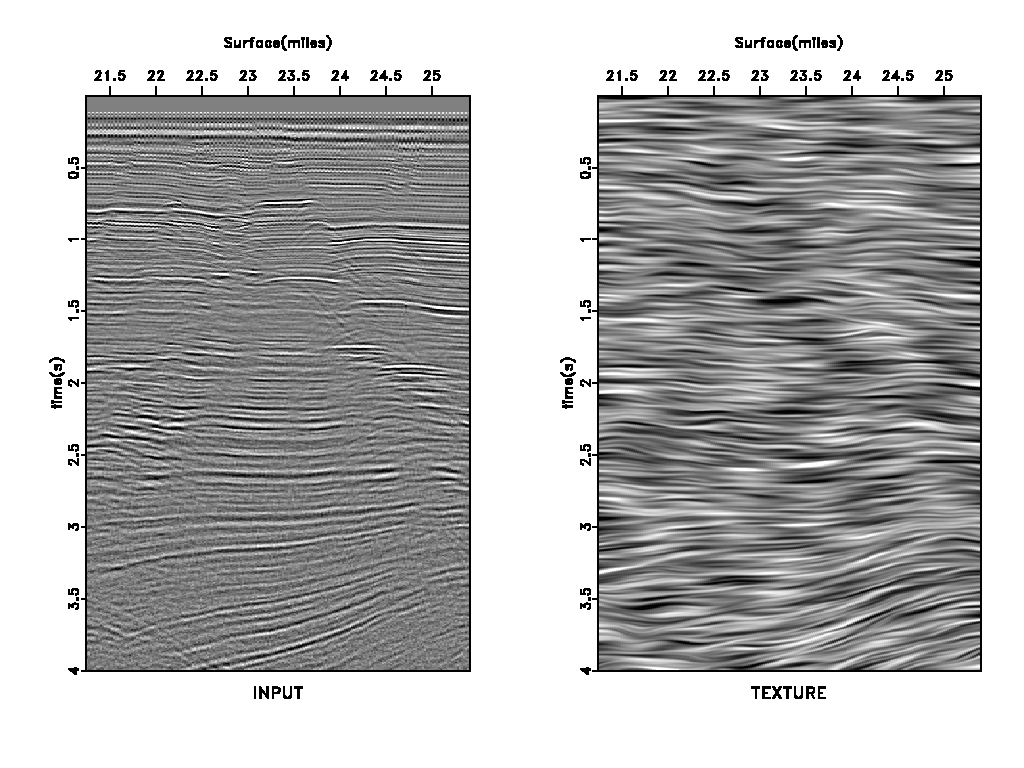

In [42]:
view('dgulf-txr')

<p id="fig:yc27-txr" style="color:navy">Figure 9: Time section from the Gulf of Mexico. Left plot: Input data. Right plot: Its texture. The texture plot shows dominant local dips estimated from the data.</p>

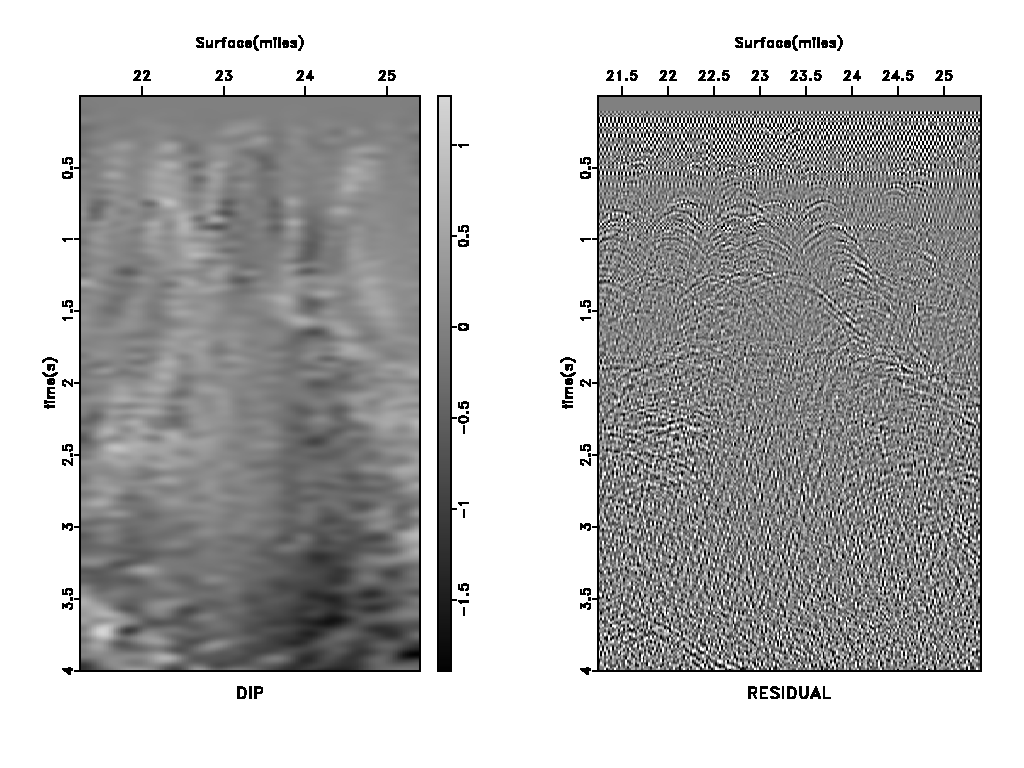

In [43]:
view('dgulf-dip')

<p id="fig:yc27-txr" style="color:navy">Figure 10: Time section from the Gulf of Mexico. Left plot: Estimated dip  field. Right plot: Prediction residual.The residual highlights diffraction events hidden under dominant reflections in the original data.</p>

Figure <a href="#fig:dgulf-txr" data-reference-type="ref" data-reference="fig:dgulf-txr">9</a>
shows a stacked time section from the Gulf of Mexico and its
corresponding texture. The texture plot demonstrates that the estimated
dip (the left plot of
Figure <a href="#fig:dgulf-dip" data-reference-type="ref" data-reference="fig:dgulf-dip">10</a>)
reflects the dominant local dip in the data. After the plane waves with
the dominant dip are removed, many hidden diffractions appear in the
residual image (the right plot in
Figure <a href="#fig:dgulf-dip" data-reference-type="ref" data-reference="fig:dgulf-dip">10</a>.)
The enhanced diffraction events can be used, for example, for estimating
the medium velocity (Harlan et al., 1984).

Overall, the examples of this subsection show that the finite-difference
plane-wave destructors provide a reliable tool for enhancement of
discontinuities and conflicting slopes in seismic images. The estimation
step of the fault detection procedure produces an image of the local
dominant dip field, which may have its own interpretational value. An
extension to 3-D is possible, as outlined by Schwab (1998), Clapp (2001), and Fomel (2001).

### Trace interpolation beyond aliasing

Spitz (1991) popularized the application of prediction-error filters to regular trace
interpolation and showed how the spatial aliasing restriction can be
overcome by scaling the lower frequencies of $F$-$X$ PEFs. An analogous
technique for $T$-$X$ filters was developed by Claerbout (1992, 1999) and was applied for 3-D
interpolation with non-stationary PEFs by Crawley (2000). The $T$-$X$ technique
implies stretching the filter in all directions so that its dip spectrum
is preserved while the coefficients are estimated at alternating traces.
After the filter is estimated, it is scaled back and used for
interpolating missing traces between the known ones. A very similar
method works for finite-difference plane wave destructors, only we need
to take special care of the aliased dips at the dip estimation stage.

In [46]:
%%file alias.scons

Flow('aliasp', None, 'aliasp cycles=25')
Plot('aliasp', 'window n1=575 | grey title=Input crowd=0.85')

Flow('dip2', 'aliasp',
     'twodip2 order=3 nj1=4 nj2=4 p0=2 q0=-1 eps=4 gauss=n')
Flow('dip1', 'aliasp dip2',
     'dip idip=${SOURCES[1]} order=3 nj1=4 rect1=7 rect2=3')
Flow('dip', 'dip1',
     'transp | spline n1=96 o1=0 d1=0.25 | transp')

Flow('aliasp4 ones4', 'aliasp', 'lpad jump=4 mask=${TARGETS[1]}')

for prec in [0, 1]:
    dealias = 'dealias%d' % prec

    Flow(dealias, 'aliasp4 dip ones4',
         '''
         planemis2 dip=${SOURCES[1]} mask=${SOURCES[2]} order=3 verb=y prec=%d
         ''' % prec)
    Plot(dealias, 'window n1=575 | grey title=Output crowd=0.85')

    Result('aliasp%d' % prec, ['aliasp', dealias], 'SideBySideAniso')

Writing alias.scons


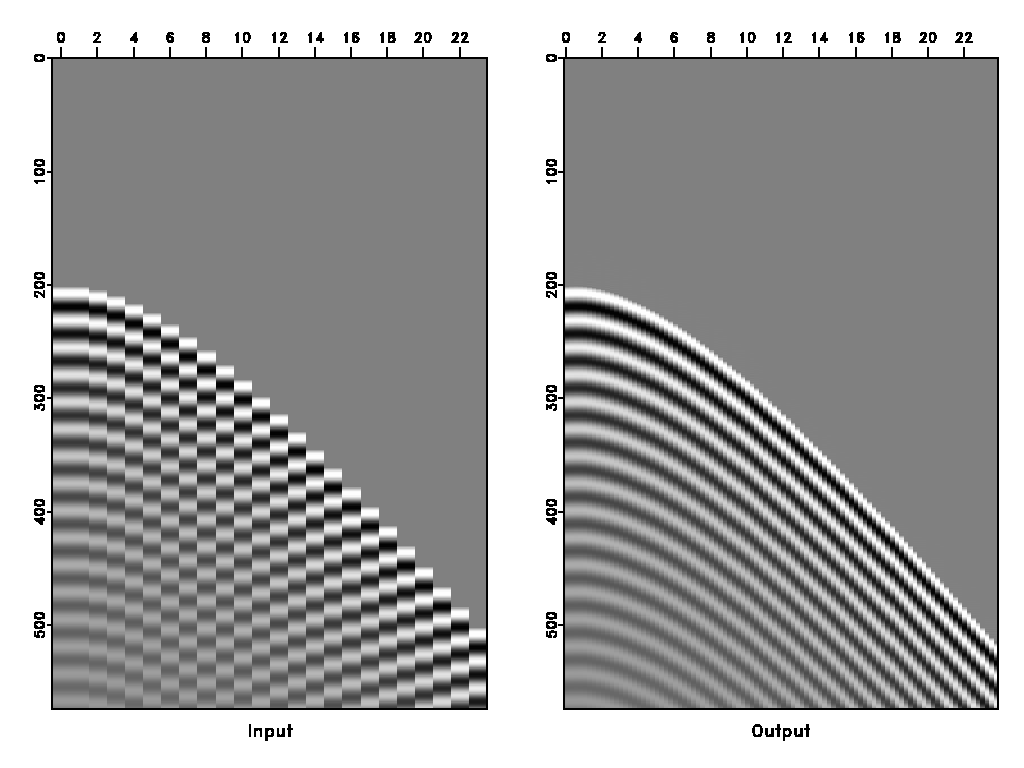

In [47]:
view('aliasp0')

<p id="fig:aliasp0" style="color:navy">Figure 11: Synthetic example of interpolation beyond aliasing with plane-wave destruction filters. Left: input aliased data, right: interpolation output.Three additional traces were inserted between each of the neighboring input traces.</a>

A simple synthetic example of interpolation beyond aliasing is shown in
Figure <a href="#fig:aliasp0" data-reference-type="ref" data-reference="fig:aliasp0">11</a>.
The input data are clearly aliased and non-stationary. To take the
aliasing into account, I estimate the two dips present in the data with
the slope estimation technique of
equations (<a href="#eqn:lin2" data-reference-type="ref" data-reference="eqn:lin2">16</a>)
and (<a href="#eqn:reg1" data-reference-type="ref" data-reference="eqn:reg1">17</a>).
The first dip corresponds to the true slope, while the second dip
corresponds to the aliased dip component. In this example, the true dip
is non-negative everywhere and is easily distinguished from the aliased
one. In the more general case, an additional interpretation may be
required to determine which of the dip components is contaminated by
aliasing. Throwing away the aliased dip and interpolating intermediate
traces with the true dip produces the accurate interpolation result
shown in the right plot of
Figure <a href="#fig:aliasp0" data-reference-type="ref" data-reference="fig:aliasp0">11</a>.
Three additional traces were inserted between each of the neighboring
input traces.

In [51]:
%%file sean.scons

Fetch('sean.HH', 'bp')

def grey(title):
    return 'grey title="%s" label2=Channel label1="Time (s)" ' % title

Flow('sean', 'sean.HH',
     'dd form=native | window n3=1 f3=3 n1=500 | bandpass fhi=50')
Plot('sean', grey('Original'))

Flow('sean2', 'sean', 'window j2=2')
Plot('sean2', grey('Decimated'))

Result('sean2', 'sean sean2', 'SideBySideAniso')

Overwriting sean.scons


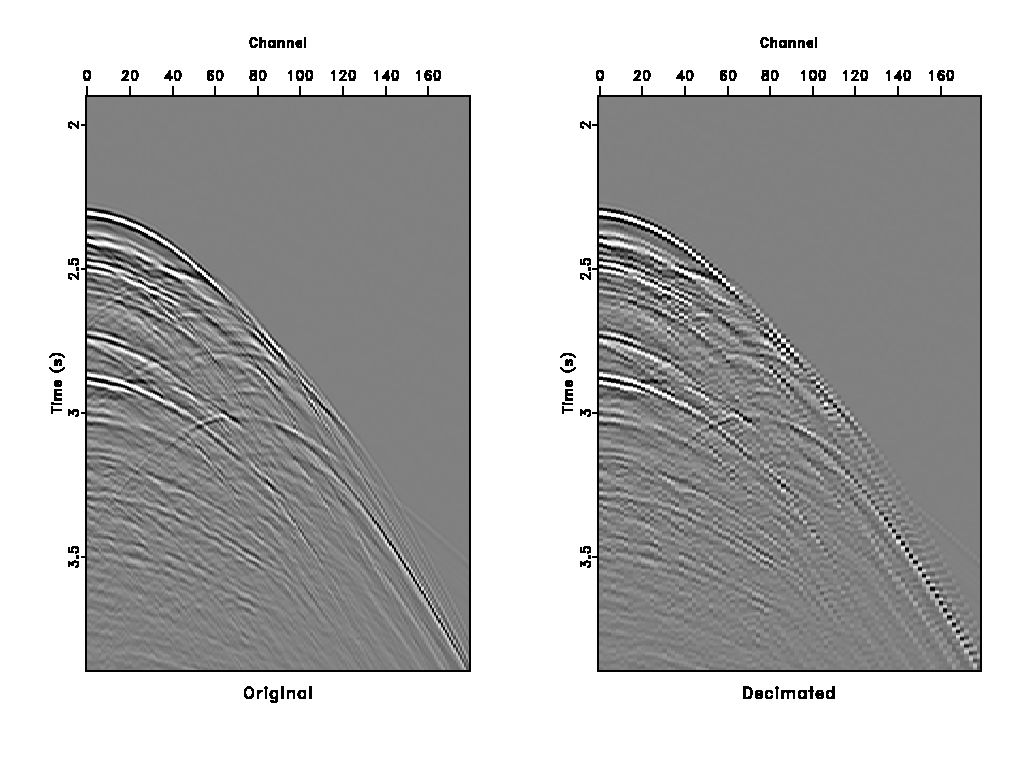

In [49]:
view('sean2')

<p id="fig:sean2" style="color:navy">Figure 12: 2-D marine shot gather. Left: original. Right: subsampled by a factor of two in the offset direction.</p>

Figure <a href="#fig:sean2" data-reference-type="ref" data-reference="fig:sean2">12</a>
shows a marine 2-D shot gather from a deep water Gulf of Mexico survey
before and after subsampling in the offset direction. The data are
similar to those used by Crawley (2000). The shot gather has long-period multiples and
complicated diffraction events caused by a salt body. The amplitudes of
the hyperbolic events are not as uniformly distributed as in the
synthetic case of
Figure <a href="#fig:aliasp0" data-reference-type="ref" data-reference="fig:aliasp0">11</a>.
Subsampling by a factor of two (the right plot in
Figure <a href="#fig:sean2" data-reference-type="ref" data-reference="fig:sean2">12</a>)
causes clearly visible aliasing in the steeply dipping events. The goal
of the experiment is to interpolate the missing traces in the subsampled
data and to compare the result with the original gather shown in the
left plot of
Figure <a href="#fig:sean2" data-reference-type="ref" data-reference="fig:sean2">12</a>.


A straightforward application of the dip estimation
equations (<a href="#eqn:lin2" data-reference-type="ref" data-reference="eqn:lin2">16</a>-<a href="#eqn:reg2" data-reference-type="ref" data-reference="eqn:reg1">17</a>)
applied to aliased data can easily lead to erroneous aliased dip
estimation because the aliased dip may get picked instead of the true
dip. In order to avoid this problem, I chose a slightly more complex
strategy. The algorithm for trace interpolation of aliased data consists
of the following steps:

1.  Applying Claerbout’s $T$-$X$ methodology, stretch a two-dip
    plane-wave destruction filter and estimate the dips from decimated
    data.

2.  The second estimated dip will be degraded by aliasing. Ignore this
    initial second-dip estimate.

3.  Estimate the second dip component again by fixing the first dip
    component and using it as the initial estimate of the second
    component. This trick prevents the nonlinear estimation algorithm
    from picking the wrong (aliased) dip in the data.

4.  Downscale the estimated two-dip filter and use it for interpolating
    missing traces.

In [60]:
%%file sean-dip.scons

def grey(title):
    return 'grey title="%s" label2=Channel label1="Time (s)" ' % title

def twodip2(extra):
    return 'twodip2 order=2 nj1=2 nj2=2 eps=8 verb=y gauss=n ' + extra

# initial estimation
Flow('pq', 'sean2', twodip2('niter=10'))
# the second dip is aliased, throw it away and reestimate
Flow('pq1', 'sean2 pq', twodip2(
    'both=n dip1=${SOURCES[1]} dip2=${SOURCES[1]}'))
# now estimate two dips again, starting from non-aliased ones
Flow('pq2', 'sean2 pq pq1', twodip2('dip1=${SOURCES[1]} dip2=${SOURCES[2]}'))
Flow('pq3', 'pq2', 'transp | spline n1=180 o1=0 d1=1 | transp')

def twodip0(extra):
    return 'twodip2 order=2 eps=8 verb=y gauss=n ' + extra

Flow('ppq', 'sean', twodip0('niter=10'))
Flow('ppq1', 'sean ppq', twodip0(
    'both=n dip1=${SOURCES[1]} dip2=${SOURCES[1]}'))
Flow('ppq2', 'sean ppq ppq1', twodip0('dip1=${SOURCES[1]} dip2=${SOURCES[2]}'))

Plot('dip1', 'pq2',
     'window n3=1 | %s pclip=100 scalebar=y color=j' % grey('First Dip'))
Plot('dip2', 'pq2',
     'window f3=1 | %s pclip=100 scalebar=y color=j' % grey('Second Dip'))
Result('sean2-dip', 'dip1 dip2', 'SideBySideAniso')

Overwriting sean-dip.scons


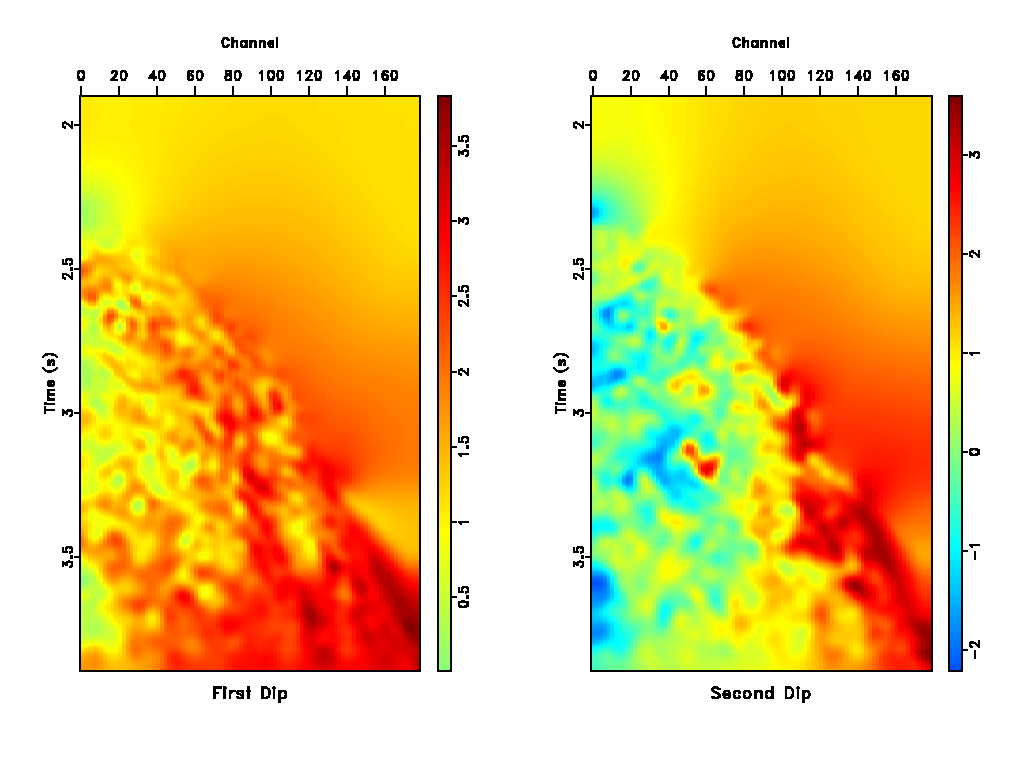

In [61]:
view('sean2-dip')

<p id="fig:sean2-dip" style="color:navy">Figure 13: Two components of the estimated dip field for the decimated 2-D marine shot gather.</p>

The two estimated dip components are shown in
Figure <a href="#fig:sean2-dip" data-reference-type="ref" data-reference="fig:sean2-dip">13</a>.
The first component contains only positive dips. The second component
coincides with the first one in the areas where only a single dip is
present in the data. In other areas, it picks the complementary dip,
which has a negative value for back-dipping hyperbolic diffractions.

In [66]:
%%file sean-int.scons

Flow('pad mask','sean2','lpad jump=2 mask=${TARGETS[1]}')
Flow('mis', 'pad mask pq3',
     '''
     planemis2 mask=${SOURCES[1]} dip=${SOURCES[2]} order=2 verb=y |
     bandpass fhi=70
     ''')
Flow('err', 'mis sean', 'add scale=1,-1 ${SOURCES[1]}')
Flow('int', 'mis err', 'cat ${SOURCES[1]} | byte')
Plot('mis', 'int', 'window n3=1 | ' + grey('Interpolation Result'))
Plot('err', 'int', 'window f3=1 | ' + grey('Interpolation Error'))
Result('sean2-int', 'mis err', 'SideBySideAniso')

Overwriting sean-int.scons


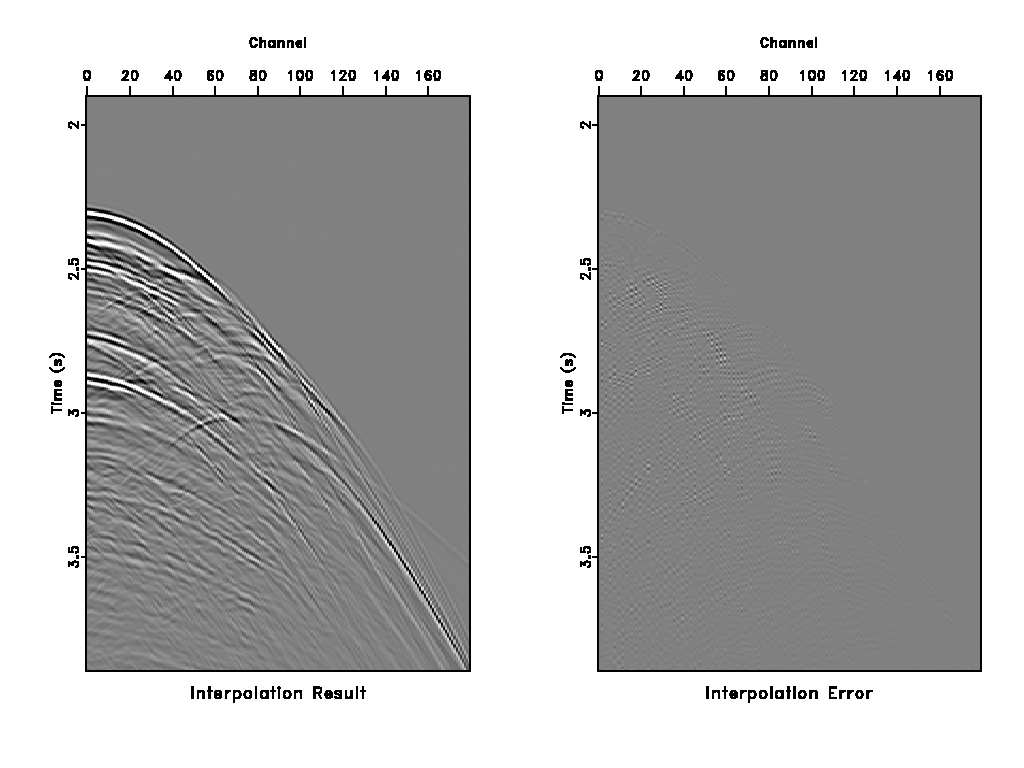

In [67]:
view('sean2-int')

<p id="fig:sean2-int" style="color:navy">Figure 14: Left: 2-D marine shot gather after trace interpolation. Right: Difference
between the interpolated and the original gather. The error is zero at the location of
original traces and fairly random at the loation of inserted traces.</p>

Figure <a href="#fig:sean2-int" data-reference-type="ref" data-reference="fig:sean2-int">14</a>
shows the interpolation result and the difference between the
interpolated traces and the original traces, plotted at the same clip
value. The method succeeded in the sense that it is impossible to
distinguish interpolated traces from the interpolation result alone.
However, it is not ideal, because some of the original energy is missing
in the output. 

In [70]:
%%file sean-close.scons

def grey(title):
    return 'grey title="%s" label2=Channel label1="Time (s)" ' % title

Plot('win','sean',
     'window min1=2.5 max1=3.1 max2=120 | ' + grey('Original'))
Plot('win2','mis',
     'window min1=2.5 max1=3.1 max2=120 | ' + grey('Interpolated'))
Result('sean2-close','win win2','SideBySideAniso')

Overwriting sean-close.scons


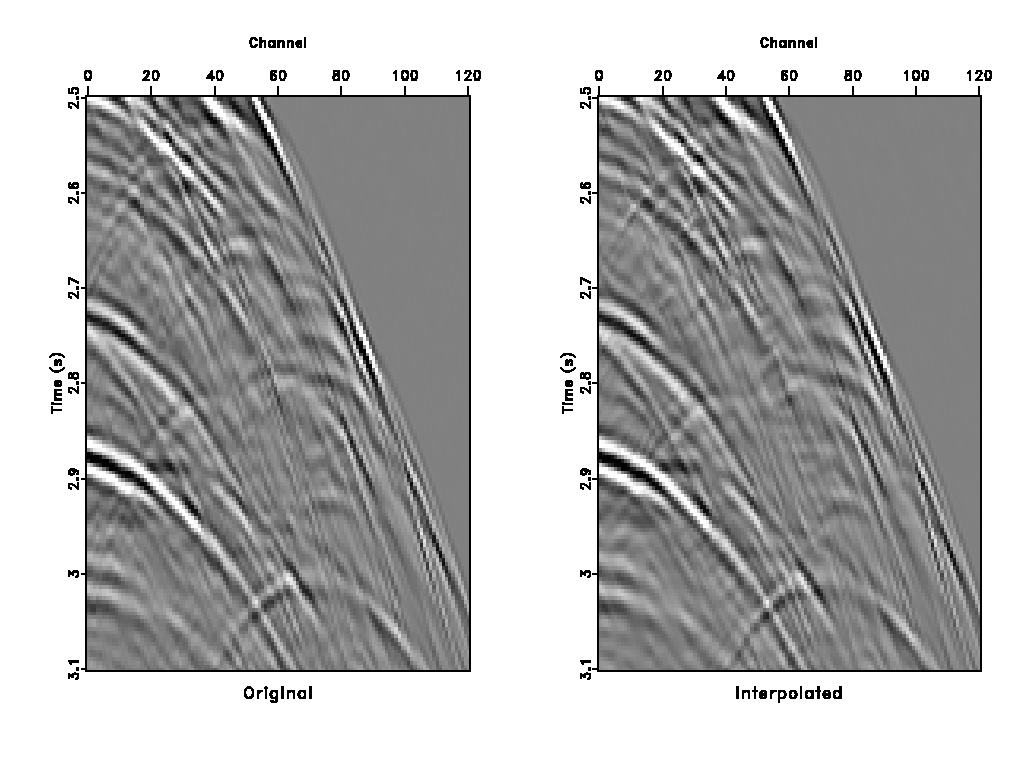

In [71]:
view('sean2-close')

<p id="fig:sean2-close" style="color:navy">Figure 15: Close-up comparison of the interpolated (right) and the original data (left).</p>

A close-up comparison between the original and the
interpolated traces in
Figure <a href="#fig:sean2-close" data-reference-type="ref" data-reference="fig:sean2-close">15</a>
shows that imperfection in more detail. Some of the steepest events in
the middle of the section are poorly interpolated, and in some of the
other places, the second dip component is continued instead of the first
one.

One could improve the interpolation result considerably by including
another dimension. To achieve a better result, we can use a pair of
plane-wave destructors, one predicting local plane waves in the offset
direction and the other predicting local plane waves in the shot
direction.

### Signal and noise separation

Signal and noise separation and noise attenuation are yet another
important application of plane-wave prediction filters. A random noise
attention has been successfully addressed by Canales (1984), Gulunay (1986), Abma and Claerbout (1995), Soubaras
(1995), and others. A more
challenging problem of coherent noise attenuation has only recently
joined the circle of the prediction technique applications (Spitz, 1999;
Brown and Clapp, 2000; Guitton et al., 2001).

The problem has a very clear interpretation in terms of the local dip
components. If two components, $\mathbf{s}_1$ and $\mathbf{s}_2$ are
estimated from the data, and we can interpret the first component as
signal, and the second component as noise, then the signal and noise
separation problem reduces to solving the least-squares system
\begin{equation}
  \label{eqn:sn1}
\begin{aligned}
  \mathbf{C}(\mathbf{s}_1) \mathbf{d}_1 & \approx & 0 \;, \\
  \epsilon \mathbf{C}(\mathbf{s}_2) \mathbf{d}_2 & \approx & 0 \;\end{aligned}
\end{equation}
for the unknown signal and noise components $\mathbf{d}_1$ and
$\mathbf{d}_2$ of the input data $\mathbf{d}$: 
\begin{equation}
\label{eqn:dsn}
  \mathbf{d}_1 + \mathbf{d}_2 = \mathbf{d}.
\end{equation}
The scalar parameter $\epsilon$ in
equation (<a href="#eqn:sn2" data-reference-type="ref" data-reference="eqn:sn1">18</a>)
reflects the signal to noise ratio. We can combine
equations (<a href="#eqn:sn1" data-reference-type="ref" data-reference="eqn:sn1">18</a>)
and (<a href="#eqn:dsn" data-reference-type="ref" data-reference="eqn:dsn">19</a>)
in the explicit system for the noise component $\mathbf{d}_2$:
\begin{equation}
  \label{eqn:s1}
 \begin{aligned}
  \mathbf{C}(\mathbf{s}_1) \mathbf{d}_2 & \approx & 
  \mathbf{C}(\mathbf{s}_1) \mathbf{d}\;, \\
  \epsilon \mathbf{C}(\mathbf{s}_2) \mathbf{d}_2 & \approx & 0 \;.\end{aligned}
\end{equation}

In [74]:
%%file signoi.scons

def plot(title):
    return '''
    grey wantaxis1=n label1=Sample label2=Trace title="%s"
    labelsz=12 titlesz=15 crowd1=0.9
    ''' % title

Flow('noiz', None, 'make second=n n1=75 n2=25 t1=2')
Plot('noiz', plot('Signal'))

Flow('make', None, 'make second=y n1=75 n2=25 t1=2 | put o1=0 d1=1 o2=0 d2=1')
Plot('make', plot('Signal+Noise'))

Flow('spq', 'make', 'twodip2 verb=y gauss=n')
Flow('spq1', 'spq', 'window n3=1')
Flow('spq2', 'spq', 'window f3=1')
Flow('sn2', 'make spq1 spq2',
     'planesignoi ndip=${SOURCES[1]} sdip=${SOURCES[2]} eps=1 verb=1')
Plot('ss', 'sn2', 'window n3=1 | ' + plot('Est. Signal'))
Plot('nn', 'sn2', 'window f3=1 | ' + plot('Est. Noise'))

Result('sn2', 'noiz make ss nn', 'SideBySideAniso', vppen='txscale=2')

Overwriting signoi.scons


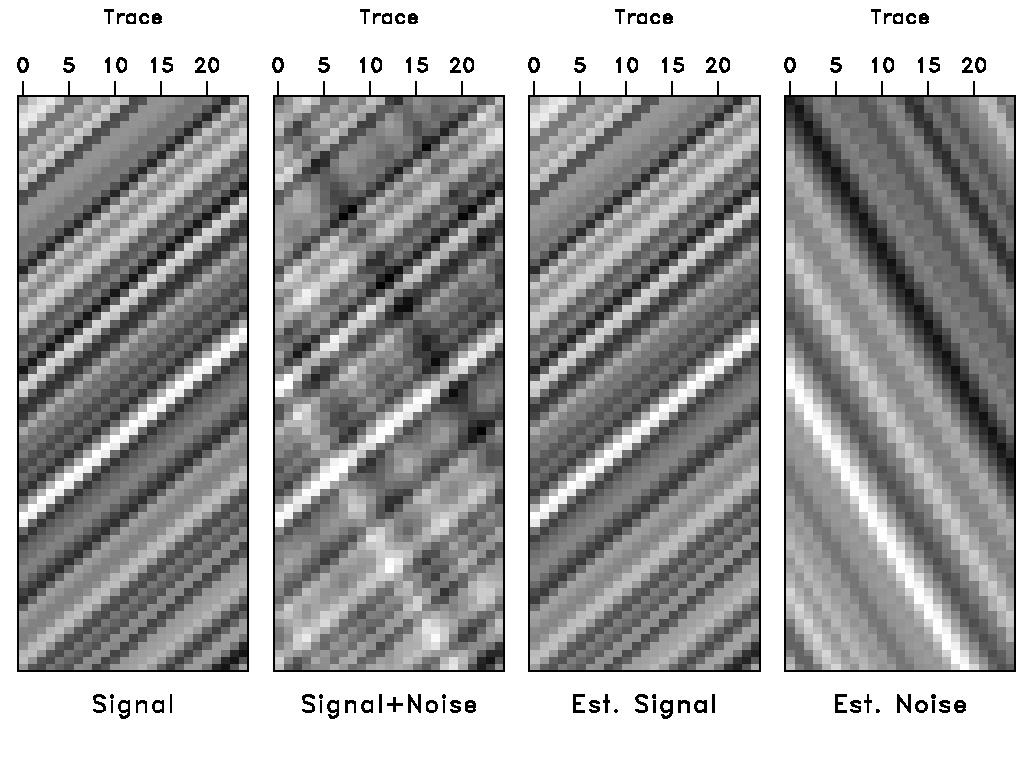

In [75]:
view('sn2')

<p id="fig:sn2" style="color:navy">Figure 16: Simple example of dip-based single and noise separation. From left to
right: ideal signal, input data, estimated signal, estimated noise.</p>

Figure <a href="#fig:sn2" data-reference-type="ref" data-reference="fig:sn2">16</a>
shows a simple example of the described approach. I estimated two dip
components from the input synthetic data and separated the corresponding
events by solving the least-squares
system (<a href="#eqn:s1" data-reference-type="ref" data-reference="eqn:s1">20</a>).
The separation result is visually perfect.

In [76]:
%%file dune.scons

Fetch('dune3D.H', 'mideast')

Flow('dat', 'dune3D.H',
     'dd form=native | window n3=1 f3=2 n1=500 f1=100 | scale dscale=100.')

Result('dune-dat', 'dat',
       'grey pclip=95 label1="Time (s)" label2="Offset (m)" ')

Writing dune.scons


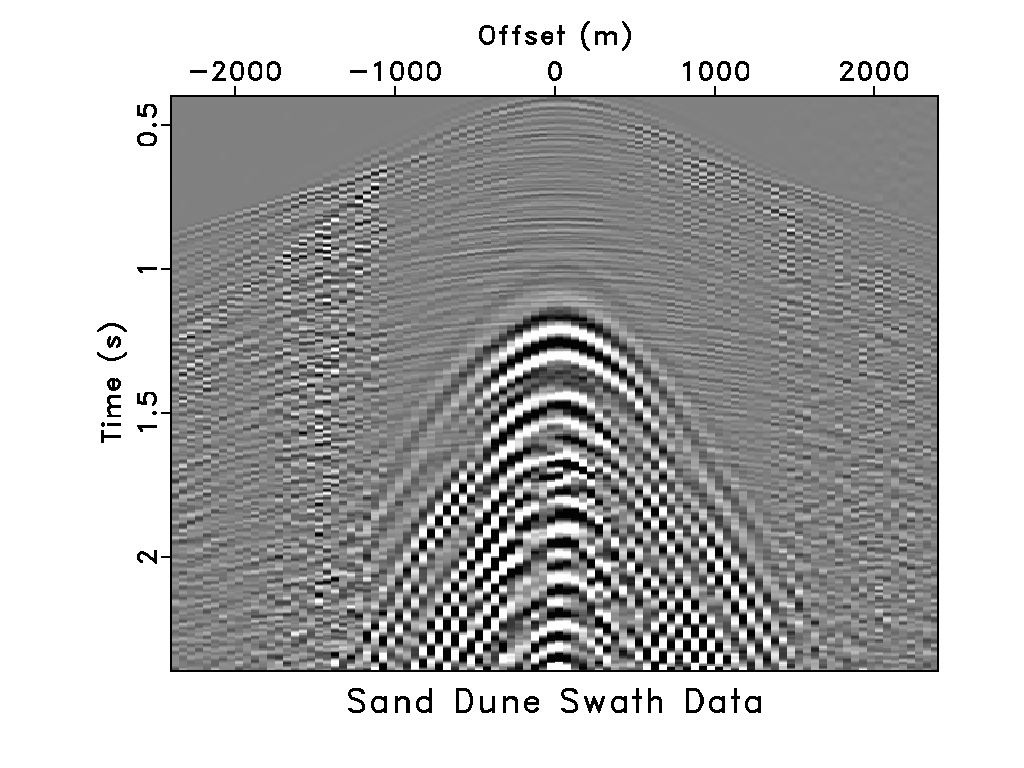

In [77]:
view('dune-dat')

<p id="fig:dune-dat" style="color:navy">Figure 17: Ground-roll-contaminated data from Saudi Arabian sand dunes. A reciever cable out of a 3-D shot gather.</p>

Figure <a href="#fig:dune-dat" data-reference-type="ref" data-reference="fig:dune-dat">17</a>
presents a significantly more complicated case: a receiver line from of
a 3-D land shot gather from Saudi Arabia, contaminated with
three-dimensional ground-roll, which appears hyperbolic in the
cross-section. The same dataset has been used previously by Brown and Clapp (2000). The
ground-roll noise and the reflection events have a significantly
different frequency content, which might suggest separating them on the
base of frequency alone. 

In [84]:
%%file dune-exp.scons

Flow('dnoiz', 'dat',
     '''
     bandpass fhi=20. |
     mutter half=n v0=1500 t0=0.8 hyper=y tp=0.12 |
     window f1=90 | pad beg1=90
     ''')
Flow('dmask', 'dnoiz',
     'math output="input*input" | smooth rect1=5 rect2=5 | mask min=0.01')
Flow('mask2', 'dmask', 'dd type=float')

Flow('dat2', 'mask2 dat', 'add mode=p ${SOURCES[1]}')

Flow('freq', 'dat2', 'twofreq2 verb=y')

for case in range(3):
    eps = (0.1, 5, 0.05)[case]
    Flow(f'exp{case}', 'dat2 freq',
         f'expsignoi eps={eps} freq=${{SOURCES[1]}} niter=100 verb=y')

Flow('ex', 'exp2 mask2 dat dat2',
     '''
     window n3=1 | add mode=p ${SOURCES[1]} |
     add scale=1,1,-1 ${SOURCES[2:4]}
     ''')
Flow('expsn', 'exp2 ex',
     'window f3=1 | cat ${SOURCES[1]} | byte pclip=95 gainpanel=all')

Plot('exps', 'expsn',
     '''
     window f3=1 | grey label1="Time (s)" label2="Offset (m)"
     title="Estimated Signal"
     ''')
Plot('expn', 'expsn',
     '''
     window n3=1 | grey label1="Time (s)" label2="Offset (m)"
     title="Estimated Noise"
     ''')
Result('dune-exp', 'exps expn', 'OverUnderAniso')

Overwriting dune-exp.scons


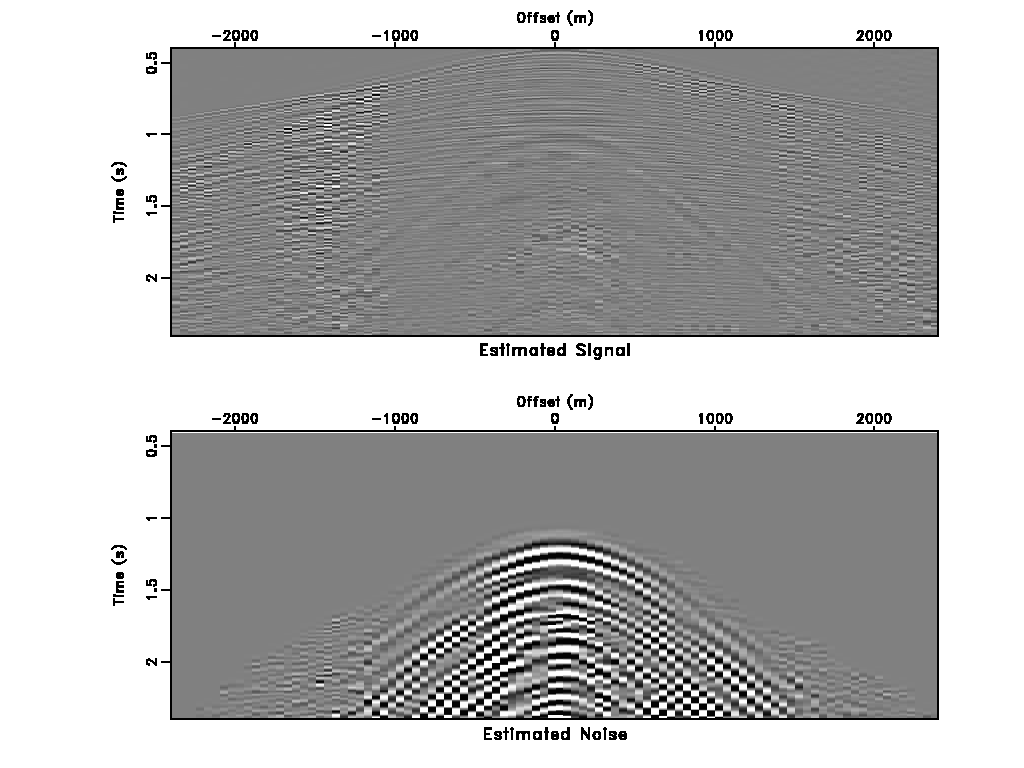

In [85]:
view('dune-exp')

<p id="fig:dune-exp" style="color:navy">Figure 18: Signal and noise separation based on frequency. Top: estimated signal. Bottom: estimated noise.</p>

The result of frequency-based separation, shown in Figure <a href="#fig:dune-exp" data-reference-type="ref" data-reference="fig:dune-exp">18</a>
is, however, not ideal: part of the noise remains in the estimated
signal after the separation. Changing the $\epsilon$ parameter in
equation (<a href="#eqn:s1" data-reference-type="ref" data-reference="eqn:s1">20</a>)
could clean up the signal estimate, but it would also bring some of the
signal into the subtracted noise. 

A better strategy is to separate the
events by using both the difference in frequency and the difference in
slope. For that purpose, I adopted the following algorithm:

1.  Use a frequency-based separation (or, alternatively, a simple
    low-pass filtering) to obtain an initial estimate of the ground-roll
    noise.

2.  Select a window around the initial noise. The further separation
    will happen only in that window.

3.  Estimate the noise dip from the initial noise estimate.

4.  Estimate the signal dip in the selected data window as the
    complimentary dip component to the already known noise dip.

5.  Use the signal and noise dips together with the signal and noise
    frequencies to perform the final separation. This is achieved by
    cascading single-dip plane-wave destruction filters with local 1-D
    three-coefficient PEFs aimed at destroying a particular frequency.

In [88]:
%%file dune-sn.scons


Flow('sdip', 'exp1 dmask',
     'window n3=1 | dip verb=y order=2 rect1=10 rect2=10 mask=${SOURCES[1]}')
Flow('ndip', 'exp2 dmask',
     'window f3=1 | dip verb=y order=2 rect1=10 rect2=10 mask=${SOURCES[1]}')

Flow('sn', 'dat2 ndip sdip freq',
     '''
     explanesignoi niter=2000 verb=y ndip=${SOURCES[1]} sdip=${SOURCES[2]}
     freq=${SOURCES[3]} eps=0.01
     ''')
Flow('sig', 'sn mask2 dat dat2',
     '''
     window n3=1 | add mode=p ${SOURCES[1]} |
     add scale=1,1,-1 ${SOURCES[2:4]}
     ''')
Flow('signoi', 'sn sig',
     'window f3=1 | cat ${SOURCES[1]} | byte pclip=95 gainpanel=all')

Plot('sig', 'signoi',
     '''
     window f3=1 | grey label1="Time (s)" label2="Offset (m)"
     title="Estimated Signal"
     ''')
Plot('noi', 'signoi',
     '''
     window n3=1 | grey label1="Time (s)" label2="Offset (m)"
     title="Estimated Noise"
     ''')

Result('dune-sn', 'sig noi', 'OverUnderAniso')

Overwriting dune-sn.scons


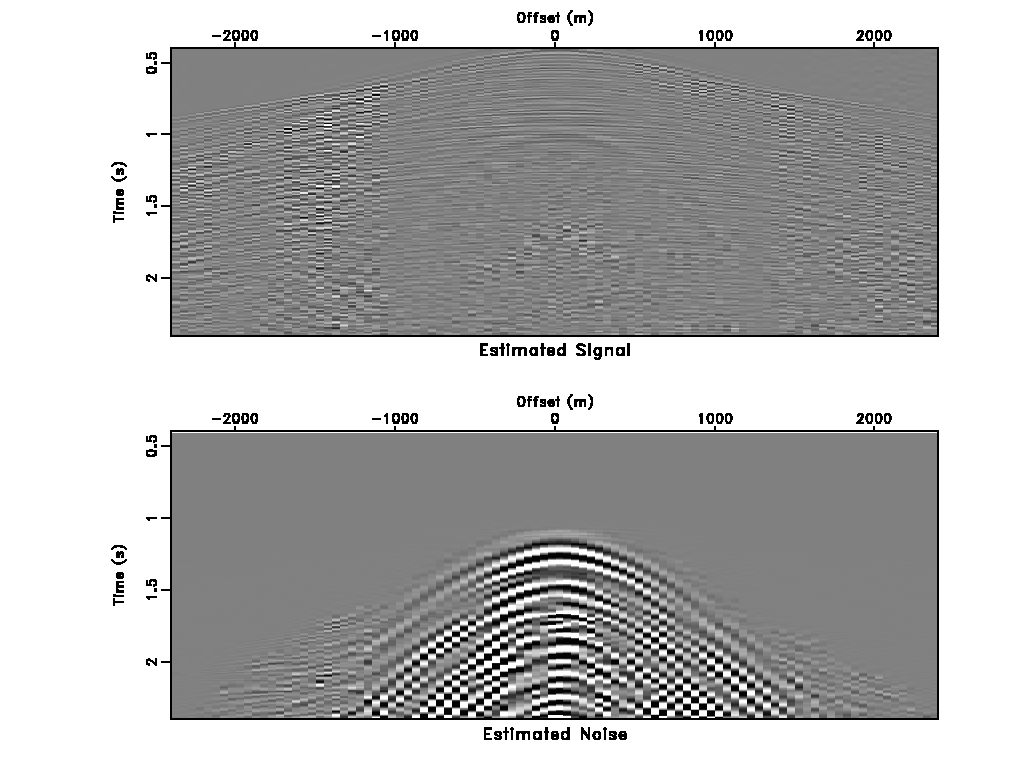

In [89]:
view('dune-sn')

<p id="fig:dune-sn" style="color:navy">Figure 19: Signal and noise separation based on both apparent dip and frequency in
the considered receiver cable. Top: estimated signal. Bottom: estimated noise.</p>

The separation result is shown in
Figure <a href="#fig:dune-sn" data-reference-type="ref" data-reference="fig:dune-sn">19</a>.
The separation goal has been fully achieved: the estimated ground-roll
noise is free of the signal components, and the estimated signal is free
of the noise.

The examples in this subsection show that when the signal and noise
components have distinctly different local slopes, we can successfully
separate them with plane-wave destruction filters.


## Conclusions

Plane-wave destruction filters with an improved finite-difference design
can be a valuable tool in processing multidimensional seismic data. On
several examples, I showed their good performance in such problems as
fault detection, missing data interpolation, and noise attenuation.
Although only 2-D examples were demonstrated, it is straightforward to
extend the method to 3-D applications by considering two orthogonal
plane-wave slopes.

The similarities and differences between plane-wave destructors and
$T$-$X$ prediction-error filters can be summarized as follows:

Similarities:

-   Both types of filters operate in the original time-and-space domain
    of recorded data.

-   Both filters aim to predict local plane-wave events in the data.

-   In most problems, one filter type can be replaced by the other, and
    certain techniques, such as Claerbout’s trace interpolation method,
    are common for both approaches.

Differences:

-   The design of plane-wave destructors is purely deterministic and
    follows the plane-wave differential equation. The design of $T$-$X$
    PEF has statistical roots in the framework of the maximum-entropy
    spectral analysis . In principle, $T$-$X$ PEF can characterize more
    complex signals than local plane waves.

-   In the case of PEF, we estimate filter coefficients. In the case of
    plane-wave destructors, the estimated quantity is the local
    plane-wave slope. Several important distinctions follow from that
    difference:

    -   The filter-estimation problem is linear. The slope estimation
        problem, in the case of the improved filter design, is
        non-linear, but allows for an iterative linearization. In
        general, non-linearity is an undesirable feature because of
        local minima and the dependence on initial conditions. However,
        we can sometimes use it creatively. For example, it helped to
        avoid aliased dips in the trace interpolation example.

    -   Non-stationarity is handled gracefully in the local slope
        estimation. No local windows are required to produce a smoothly
        varying estimate of the local slope. This is a much more
        difficult issue for PEFs because of the largely under-determined
        problem.

    -   Local slope has a clearly interpretable physical meaning, which
        allows for easy quality control of the results. The coefficients
        of $T$-$X$ PEFs are much more difficult to interpret.

-   The efficiency of the two approaches is difficult to compare.
    Plane-wave destructors are generally more efficient to apply because
    of the small number of filter coefficients. However, they may
    require more computation at the estimation stage because of the
    non-linearity problem.

## Acknowledgments

This work was partially accomplished at the Stanford Exploration Project
(SEP).

I would like to thank Jon Claerbout, Robert Clapp, Matthias Schwab, and
other SEP members for developing and maintaining the reproducible
research technology, which helped this research.

Suggestions from two anonymous reviewers helped to improve the paper.

## References

Abma, R., and J. Claerbout, 1995, Lateral prediction for noise
attenuation by t-x and F-X techniques: Geophysics, **60**, 1887–1896.

Bednar, J. B., 1998, Least squares dip and coherency attributes: 68th
Ann. Internat. Mtg, Soc. of Expl. Geophys., 653–655.

Brown, M., and R. Clapp, 2000, T-X domain, pattern-based ground-roll
removal, *in* 70th Annual Internat. Mtg., Soc. Expl. Geophys., Expanded
Abstracts: Soc. Expl. Geophys., 2103–2106.

Burg, J. P., 1975, Maximum entropy spectral analysis: PhD thesis,
Stanford University.

Canales, L. L., 1984, Random noise reduction: 54th Ann. Internat. Mtg,
Soc. of Expl. Geophys., Session:S10.1.

Claerbout, J., 1998, Multidimensional recursive filters via a helix:
Geophysics, **63**, 1532–1541.

——–, 1999, Geophysical estimation by example: Environmental soundin gs
image enhancement: Stanford Exploration Project.

Claerbout, J., and M. Brown, 1999, Two-dimensional textures and
prediction-error filters: 61st Mtg., Eur. Assn. Geosci. Eng.,
Session:1009.

Claerbout, J. F., 1992, Earth Soundings Analysis: Processing Versus
Inversion: Blackwell Scientific Publications.

——–, 1994, Applications of two- and three-dimensional filtering: 64th
Ann. Internat. Mtg, Soc. of Expl. Geophys., 1572–1575.

Clapp, R. G., 2001, Geologically constrained migration velocity
analysis: PhD thesis, Stanford University.

Clapp, R. G., B. L. Biondi, S. B. Fomel, and J. F. Claerbout, 1998,
Regularizing velocity estimation using geologic dip information: 68th
Ann. Internat. Mtg, Soc. of Expl. Geophys., 1851–1854.

Crawley, S., 2000, Seismic trace interpolation with nonstationary
prediction-error filters: PhD thesis, Stanford University.

Crawley, S., J. Claerbout, and R. Clapp, 1999, Interpolation with
smoothly nonstationary prediction-error filters: 69th Ann. Internat.
Mtg, Soc. of Expl. Geophys., 1154–1157.

Fomel, S., 2001, Three-dimensional seismic data regularization: PhD
thesis, Stanford University.

Fomel, S., and J. F. Claerbout, 2002, Multidimensional recursive filter
preconditioning in geophysical estimation problems: Geophysics, accepted
for publication.

Freeman, W. T., and E. H. Adelson, 1991, The design and use of steerable
filters: IEEE Trans. on Pattern Analysis and Machine Intelligence,
**1**, 891–906.

Guitton, A., M. Brown, J. Rickett, and R. Clapp, 2001, Multiple
attenuation using a t-x pattern-based subtraction method: 71st Ann.
Internat. Mtg, Soc. of Expl. Geophys., 1305–1308.

Gulunay, N., 1986, Fx decon and complex Wiener prediction filter: 56th
Ann. Internat. Mtg., Soc. of Expl. Geophys., Session:POS2.10.

Harlan, W. S., J. F. Claerbout, and F. Rocca, 1984, Signal/noise
separation and velocity estimation: Geophysics, **49**, 1869–1880.

Kim, S., and W. W. Symes, 1998, Smooth detectors of linear phase:
Inverse Problems, **14**, 101–112.

Neidell, N. S., and M. T. Taner, 1971, Semblance and other coherency
measures for multichannel data: Geophysics, **36**, 482–497.

Nichols, D., 1990, Estimation of missing data by least squares, *in*
SEP-65: Stanford Exploration Project, 271–294.

Schwab, M., 1998, Enhancement of discontinuities in seismic 3-D images
using a Java estimation library: PhD thesis, Stanford University.

Schwab, M., J. Claerbout, and C. Holden, 1996, Revealing geological
discontinuities by plane reflector suppression, *in* 66th Annual
Internat. Mtg., Soc. Expl. Geophys., Expanded Abstracts: Society Of
Exploration Geophysicists, 302–305.

Simoncelli, E. P., and H. Farid, 1996, Steerable wedge filters for local
orientation analysis: IEEE Trans. on Image Processing, **5**, 1377–1382.

Soubaras, R., 1995, Prestack random and impulsive noise attenuation by
F-X projection filtering: 65th Ann. Internat. Mtg, Soc. of Expl.
Geophys., 711–714.

Spitz, S., 1991, Seismic trace interpolation in the F-X domain:
Geophysics, **56**, 785–794.

——–, 1999, Pattern recognition, spatial predictability, and subtraction
of multiple events: The Leading Edge, **18**, 55–58.

Symes, W. W., 1994, The plane wave detection problem: Inverse Problems,
**10**, 1361–1391.

Symes, W. W., and J. J. Carazzone, 1991, Velocity inversion by
differential semblance optimization: Geophysics, **56**, 654–663.

Yilmaz, O., and D. Cumro, 1983, Worldwide assortment of field seismic
records, released by Western Geophysical Company of America: Houston.

## Appendix: Determining filter coefficients by Taylor expansion

This appendix details the derivation of
equations (<a href="#eqn:b3" data-reference-type="ref" data-reference="eqn:b3">9</a>)
and (<a href="#eqn:b5" data-reference-type="ref" data-reference="eqn:b5">10</a>).
The main idea to match the frequency responses of the approximate
plane-wave filters to the response of the exact phase-shift operator at
low frequencies.

The Taylor series expansion of the phase-shift operator $e^{i \omega
  \sigma}$ around the zero frequency $\omega=0$ takes the form
\begin{equation}
e^{i \omega \sigma} \approx 1 + i\, \,\sigma\,\omega - 
  \frac{\sigma^2\,\omega^2}{2} - i\, \frac{\sigma^3\,\omega^3}{6} +
  \mbox{O}\left(\omega^4\right)
  \label{eq:eseries}
\end{equation}
The Taylor expansion of the six-point implicit
finite-difference operator takes the form 
\begin{equation}
\begin{aligned}
  \nonumber
\frac{B_3(Z_t)}{B_3(1/Z_t)} & = &
\frac
{b_{-1}\,Z_t^{-1} + b_0 + b_1\,Z_t}
{b_1\,Z_t + b_0 + b_{-1}\,Z_t^{-1}} = 
\frac
{b_{-1}\,e^{-i \omega} + b_0 + b_1\,e^{i \omega}}
{b_1\,e^{-i \omega} + b_0 + b_{-1}\,e^{i \omega}} \\
\nonumber
 & \approx &
1 - \frac{2\,i \,\left( b_{-1} - b_1 \right) \,\omega}{b_0 + b_{-1} + b_1} - 
  \frac{2\,\left( b_{-1} - b_1 \right)^2\,\omega^2}
  {\left( b_0 + b_{-1} + b_1 \right)^2} \\
& &  + 
  \frac{i\,
     \left( b_{-1} - b_1 \right) \,
     \left[ b_0^2 - b_0\,\left( b_{-1} + b_1 \right) 
       4\,\left( b_{-1}^2 - 4\,b_{-1}\,b_1 + 
          {b_1}^2 \right)  \right] \,\omega^3}
    {3\,\left(b_0 + b_{-1} + b_1\right)^3} + \ldots
\label{eq:bseries}\end{aligned}
\end{equation}
Matching the corresponding terms of
expansions (<a href="#eq:eseries" data-reference-type="ref" data-reference="eq:eseries">21</a>)
and (<a href="#eq:bseries" data-reference-type="ref" data-reference="eq:bseries">22</a>),
we arrive at the system of nonlinear equations 
\begin{equation}
  \label{eq:sys1}
\begin{aligned}
  \sigma & = & \frac{2\,\left( b_1 - b_{-1} \right) }
  {b_0 + b_{-1} +b_1} 
 \\
  \sigma^2 & = & \frac{4\,\left( b_1 - b_{-1} \right)^2}
  {\left(b_0 + b_{-1} +b_1 \right)^2} 
  \\
  \sigma^3 & = & \frac{2\,\left( b_1 - b_{-1} \right) \,
    \left[ b_0^2 - b_0\,\left( b_{-1} +b_1 \right)  + 
         4\,\left( b_{-1}^2 - 4\,b_{-1}\,b_1 + 
            b_1^2 \right)  \right] }
      {\left(b_0 + b_{-1} + b_1 \right)^3}
      \end{aligned}
\end{equation}
System (<a href="#eq:sys1" data-reference-type="ref" data-reference="eq:sys1">23</a>)
does not uniquely constrain the filter coefficients $b_{-1}$, $b_0$, and
$b_1$ because the second
equation 
simply follows
from the first equation
and because all the coefficients can be multiplied simultaneously by an
arbitrary constant without affecting the ratios in
equation (<a href="#eq:bseries" data-reference-type="ref" data-reference="eq:bseries">22</a>).
I chose an additional constraint in the form 
\begin{equation}
\label{eq:b0}
  B_3(1) = b_{-1} + b_0 + b_1 = 1\;,
\end{equation}  
which ensures that the filter
$B_3(Z_t)$ does not alter the zero frequency component.
System (<a href="#eq:sys1" data-reference-type="ref" data-reference="eq:sys1">23</a>)
with the additional
constraint (<a href="#eq:b0" data-reference-type="ref" data-reference="eq:b0">24</a>)
resolves uniquely to the coefficients of
filter (<a href="#eqn:b3" data-reference-type="ref" data-reference="eqn:b3">9</a>)
in the main text: 
\begin{equation}
   \label{eq:sol1}
\begin{aligned}
   b_{-1} & = & \frac{(1-\sigma)(2-\sigma)}{12}\;;   
   \\
  b_0 & = & \frac{(2+\sigma)(2-\sigma)}{6}\;; 
  \\
  b_1 & = & \frac{(1+\sigma)(2+\sigma)}{12}\;.
  \end{aligned}
\end{equation} 

The $B_5$ filter of
equation (<a href="#eqn:b5" data-reference-type="ref" data-reference="eqn:b5">10</a>)
is constructed in a completely analogous way, using longer Taylor
expansions to constrain the additional coefficients. Generalization to
longer filters is straightforward.

The technique of this appendix aims at matching the filter responses at
low frequencies. One might construct different filter families by
employing other criteria for filter design (least squares fit,
equiripple, etc.)